## Summary

1. Data Understanding
2. Data Cleaning
3. Data Analysis <br>
    3.1. Dervied Metrics <br>
    3.2. Univariate Analysis <br>
    3.2.1. Univariate Segmeneted Analysis<br>
    3.3. Bivariate Analysis<br>
    3.3.1. Bivariate analysis on continuous variables<br>
    3.3.2. Bivariate analysis on categorical variables<br>
4. Driving factors <br>
5. Recommendations <br>

## 1. Data Understanding

In [1]:
#imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load csv
loan=pd.read_csv("loan.csv",low_memory=False)
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [3]:
loan.shape

(39717, 111)

## 2. Data Cleaning

##### Fix missing values in rows, columns

-Removing columns with 90% missing values <br>
-Removing column with >60% missing values <br>
-Keeping only useful columns <br>
-Removing any rows which have >5 missing values

In [4]:
# summarising missing values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# Analysing columns with mote than 90% null values
missing_col= loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_col)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [6]:
#Removing columns with 90 to 100% percent missing values
loan=loan.drop(missing_col, axis=1)

In [7]:
loan.shape

(39717, 55)

In [8]:
# summarise % of missing values again
(loan.isnull().sum()/len(loan.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [9]:
# Droping column haveing 64% missing values
loan = loan.drop(['mths_since_last_delinq'], axis=1)

In [10]:
# Dropping unnecessary columns and keeping the columns which will be useful for analysis
loan = loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv','term', 'int_rate','grade', 'sub_grade','emp_length', 'home_ownership', 'annual_inc', 'verification_status','issue_d', 'loan_status','purpose'
,'addr_state', 'dti']]

In [11]:
# analysisng missing values in rows
loan.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Length: 39717, dtype: int64

In [12]:
# checking if there are rows with more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

In [13]:
loan.shape

(39717, 16)

For "loan_status" column 'Current' does not give clear conclusion whether it is a defaulter applicant or non-defaulter hence will drop rows where loan status is "Current". 

In [14]:
loan=loan[~(loan['loan_status']=='Current')]

Replace "Charged Off" with 1 and "loan_status" with 0

In [15]:
#Replace Charged off with 1 and fully paid with 0
loan.loan_status=loan.loan_status.apply(lambda x: 1 if x=='Charged Off' else 0)

In [16]:
loan.shape

(38577, 16)

We have fixed missing values in rows, columns

##### Standardize values and correct invalid values

-Assigning correct datatypes <br>
-Removing characters like %, <, >, months

In [17]:
# Analysing data types of columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  int64  
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

In [18]:
# Removing "month" string from "term" and converting to int
loan.term=loan.term.apply(lambda x: int(x.strip("months")))

In [19]:
# Removing % from "int_rate" and converting to float
loan.int_rate=loan.int_rate.apply(lambda x: float(x.rstrip("%")))

In [20]:
#Assumption-we will replace NA with self employeed
loan.emp_length=loan.emp_length.fillna("Self Employed")

In [21]:
loan.emp_length.value_counts()

10+ years        8488
< 1 year         4508
2 years          4291
3 years          4012
4 years          3342
5 years          3194
1 year           3169
6 years          2168
7 years          1711
8 years          1435
9 years          1226
Self Employed    1033
Name: emp_length, dtype: int64

#### Outlier removal

There is huge difference between mean and max value hence we will remove outliers before analysing annual income. Impute Outliers (values from 99 to 100%) with median value.

In [22]:
# Replacing outlier in median
pd.set_option('display.float_format', lambda x: '%.3f' % x)
loan["annual_inc"].describe()

q = loan["annual_inc"].quantile(0.995)
loan.loc[(loan["annual_inc"] >= q),"annual_inc"]=loan["annual_inc"].median()
loan["annual_inc"].describe()

count    38577.000
mean     66115.384
std      37219.748
min       4000.000
25%      40000.000
50%      58868.000
75%      81000.000
max     294000.000
Name: annual_inc, dtype: float64

## 3. Data Analysis

The objective is to identify predictors of default so that at the time of loan
application, we can use those variables for approval/rejection of the loan.
There are broadly three types of variables<br>
1.Demographic variables-Those which are related to the applicant (demographic variables such as age, occupation,
employment details etc.) <br>
2.Loan characteristics- (amount of loan, interest rate, purpose of loan etc.) <br>
3.Customer behaviour variables (those which are generated after the loan is approved such
as delinquent 2 years, revolving balance, next payment date etc.) <br>

Customer behaviour variables are not known at the time of loan application hence we will not consider this for analysis or taking decision.

### 3.1.  Dervied Metrics

We will be deriving Interval based variables from exisiting numeric which will be helpful for our analysis.

<b> a. Derive interest rate range </b>

In [23]:
loan.int_rate.describe()

count   38577.000
mean       11.932
std         3.691
min         5.420
25%         8.940
50%        11.710
75%        14.380
max        24.400
Name: int_rate, dtype: float64

In [24]:
slot=['5-10','10-15','15-20','20-25']
bins=[5,10,15,20,25]
loan['int_range']=pd.cut(loan.int_rate,bins,labels=slot)

<b>b. Derive annual income ranges<b>

In [25]:
slot1=['1-50000', '50000-100000', '100000-150000','150000-200000','200000-250000']
bins1=[1, 50000, 100000, 150000, 200000,250000]
loan['annual_inc_range']=pd.cut(loan['annual_inc'], bins1, labels=slot1)
loan['annual_inc_range'].value_counts()

50000-100000     17925
1-50000          15389
100000-150000     3995
150000-200000      916
200000-250000      277
Name: annual_inc_range, dtype: int64

<b> c. Derive loan amount ranges <b>

In [26]:
bins=[0, 5000, 10000, 15000, 20000, 25000,40000]
slot=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range']=pd.cut(loan['loan_amnt'], bins, labels=slot)
loan['loan_amnt_range'].value_counts()

5000-10000         12802
0-5000              9472
10000-15000         7683
15000-20000         4349
20000-25000         2836
25000 and above     1435
Name: loan_amnt_range, dtype: int64

##### d. Derive dti ranges

In [27]:
loan['dti'].describe()
bins2=[0, 0.1, 0.2, 0.3, 0.4, 0.5,0.8]
slot2=['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5','0.5 and above']
loan['dti_range']=pd.cut(loan['dti'], bins2, labels=slot2)
loan['dti_range'].value_counts()

0.5 and above    275
0.3-0.4           95
0.4-0.5           81
0.2-0.3           81
0.1-0.2           57
0-0.1             28
Name: dti_range, dtype: int64

##### e. Derive year and month from issue date

In [28]:
# Issue date split to year and month
loan['issue_year']=pd.to_datetime(loan['issue_d'],format='%b-%y').dt.year
loan['issue_month']=pd.to_datetime(loan['issue_d'],format='%b-%y').dt.month_name().str.slice(stop=3)

### 3.2.  Univariate Analysis

In [29]:
# Function to perform univariate analysis

def univariate(dataframe,column,title,var_type='cont'):
   
    #var_type : variable type : continuos or categorical
                #Continuos   : Distplot
                #Categorical : Barplot
    if var_type=='cont' :
        plt.figure(figsize=(5,10))
        sns.boxplot(data =dataframe, x=column,orient='v')
        
    if var_type=='cat' :
        plt.xlabel(title)
        plt.ylabel('Frequency %')
        ((dataframe[column].value_counts()*100)/len(loan)).plot.bar()
        plt.show()

<b> a. Categorical Variable analysis </b>

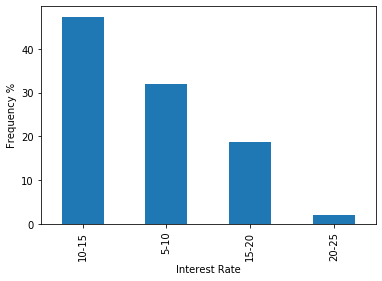

In [30]:
univariate(loan,'int_range','Interest Rate','cat')

<b>[Analysis]:</b> Majority of applicants have 10 to 15% interest rate

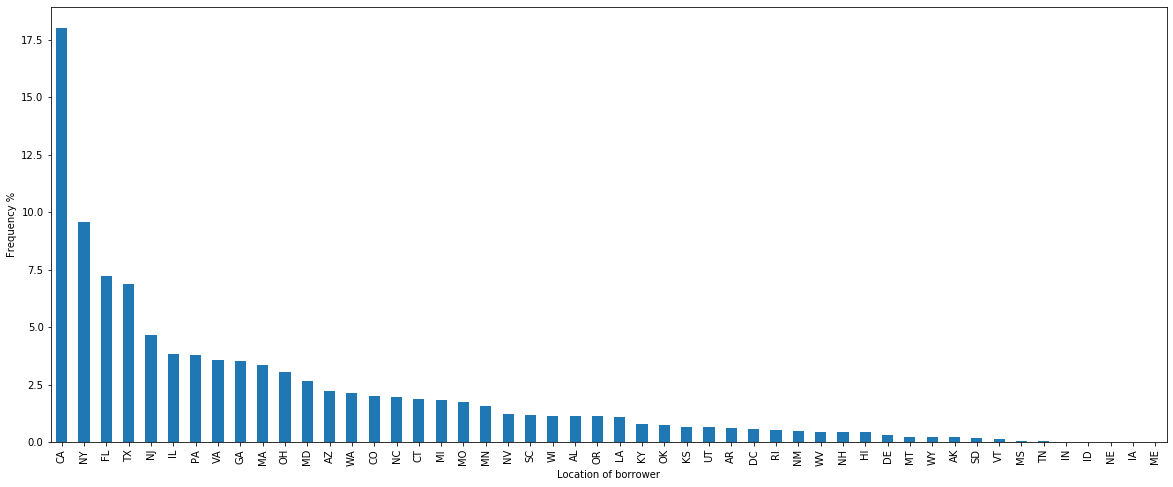

In [31]:
plt.figure(figsize=(20,8))
univariate(loan,'addr_state','Location of borrower','cat')

<b>[Analysis]:</b> Majority applicants belong to CA state

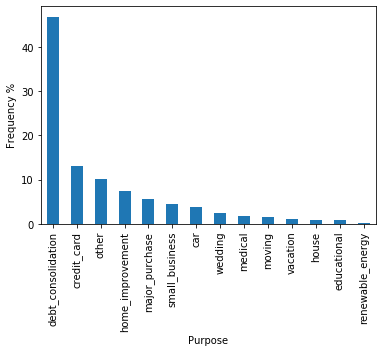

In [32]:
univariate(loan,'purpose','Purpose','cat')

<b>[Analysis]:</b> Majority of applicants have taken loan for debt consolidation

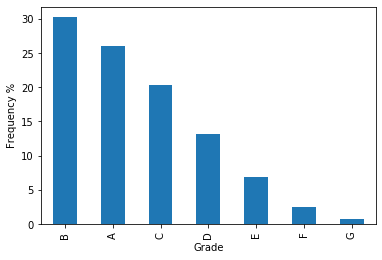

In [33]:
univariate(loan,'grade','Grade','cat')

<b>[Analysis]:</b> Majority of applicants belong to grade B

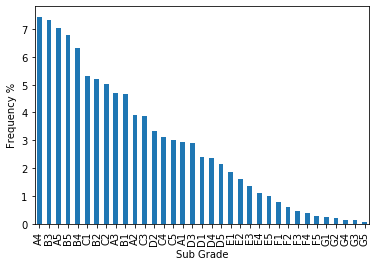

In [34]:
univariate(loan,'sub_grade','Sub Grade','cat')

<b>[Analysis]:</b> Majority of applicants belong to grade A4

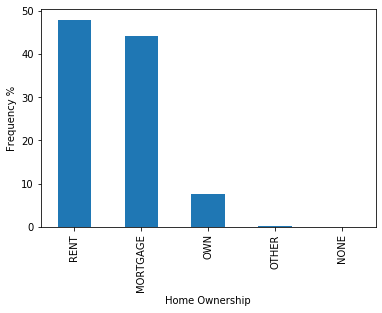

In [35]:
univariate(loan,'home_ownership','Home Ownership','cat')

<b>[Analysis]:</b> More than 40% applicants have rented home or mortgage

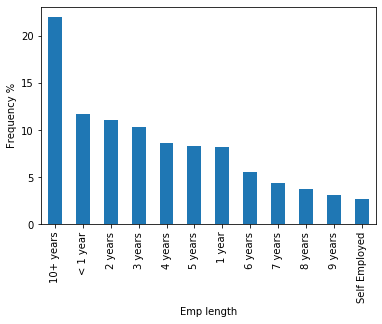

In [36]:
univariate(loan,'emp_length','Emp length','cat')

<b> [Analysis]:</b> Majority applicants who have applied for loan have 10+ years

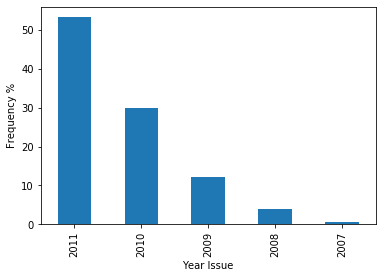

In [37]:
univariate(loan,'issue_year','Year Issue','cat')

<b> [Analysis]:</b> Majority loan were approved in 2011.

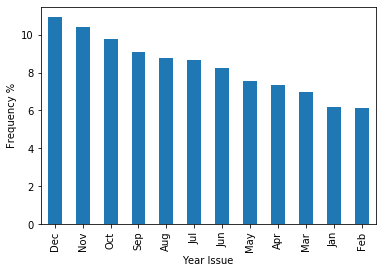

In [38]:
univariate(loan,'issue_month','Year Issue','cat')

<b> [Analysis]:</b> Majority loan were approved at the end of year i.e. Dec.

<b> b. Continuous Variable Analysis </b>

In [39]:
#Summary Metrics
loan.describe()

loan_amnt  funded_amnt  funded_amnt_inv      term  int_rate  \
count  38577.000    38577.000        38577.000 38577.000 38577.000   
mean   11047.025    10784.059        10222.481    41.898    11.932   
std     7348.442     7090.306         7022.721    10.333     3.691   
min      500.000      500.000            0.000    36.000     5.420   
25%     5300.000     5200.000         5000.000    36.000     8.940   
50%     9600.000     9550.000         8733.440    36.000    11.710   
75%    15000.000    15000.000        14000.000    36.000    14.380   
max    35000.000    35000.000        35000.000    60.000    24.400   

       annual_inc  loan_status       dti  issue_year  
count   38577.000    38577.000 38577.000   38577.000  
mean    66115.384        0.146    13.273    2010.309  
std     37219.748        0.353     6.673       0.883  
min      4000.000        0.000     0.000    2007.000  
25%     40000.000        0.000     8.130    2010.000  
50%     58868.000        0.000    13.370    2011.000  
75%     81000.000        0.000    18.560    2011.000  
max    294000.000        1.000    29.990    2011.000

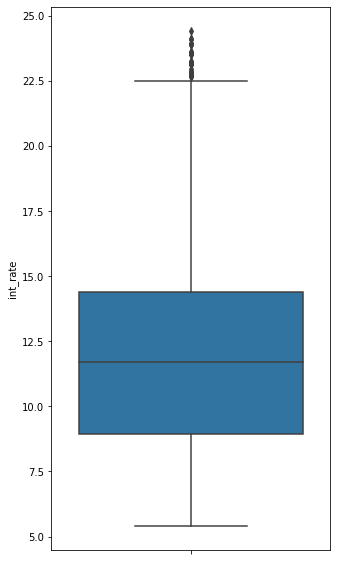

In [40]:
univariate(loan,'int_rate','Interest Rate','cont')

<b>[Analysis]: </b> Majority of applicants have taken loan at 10 to 15% interest rate.

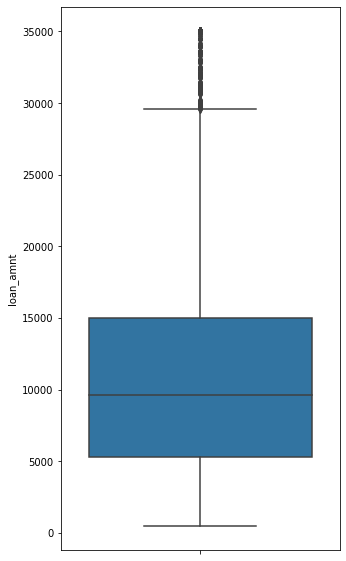

In [41]:
univariate(loan,'loan_amnt','Loan Amount','cont')

<b>[Analysis]:</b> Most of the loan amounts are distributed between 8000 to 20000 USD.

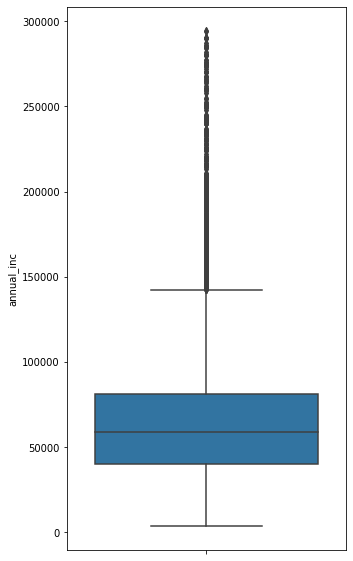

In [42]:
univariate(loan,'annual_inc','Annual Income','cont')

<b>[Analysis]:</b> Most of the applicants earns between 40000 to 90000 USD annually.

##### 3.2.1.Univariate  Segmented Analysis

We will perform univariate segmented analysis on demographic and loan characteristics.Segmentation is done on default rate. <br>

Default Rate= Number of defaults(Charged-Off)/Number of applicants            <br>


In [43]:
# Default rate diff
diff_rate={}

In [44]:
#Function for segmented univariate analysis
def univariate_segmented(col, x, y):
    #Default rate calculation
    loan_segment=loan.groupby(col)["loan_status"].mean().to_frame()
    loan_segment.plot.bar(figsize=(x,y))
    plt.ylabel("Default Rate")
    diff=loan_segment.loan_status.max()-loan_segment.loan_status.min()
    diff_rate[col]=diff
    print("Difference in information content: ",diff)
    print("Max default rate:",loan_segment.loan_status.max())
    plt.show()

Difference in information content:  0.2778623285516181
Max default rate: 0.3377926421404682


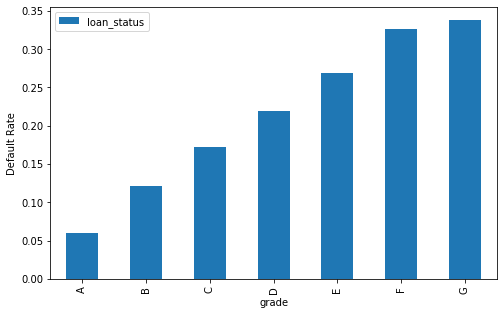

In [45]:
univariate_segmented("grade",8,5)

Difference in information content:  0.4515372124282285
Max default rate: 0.4778761061946903


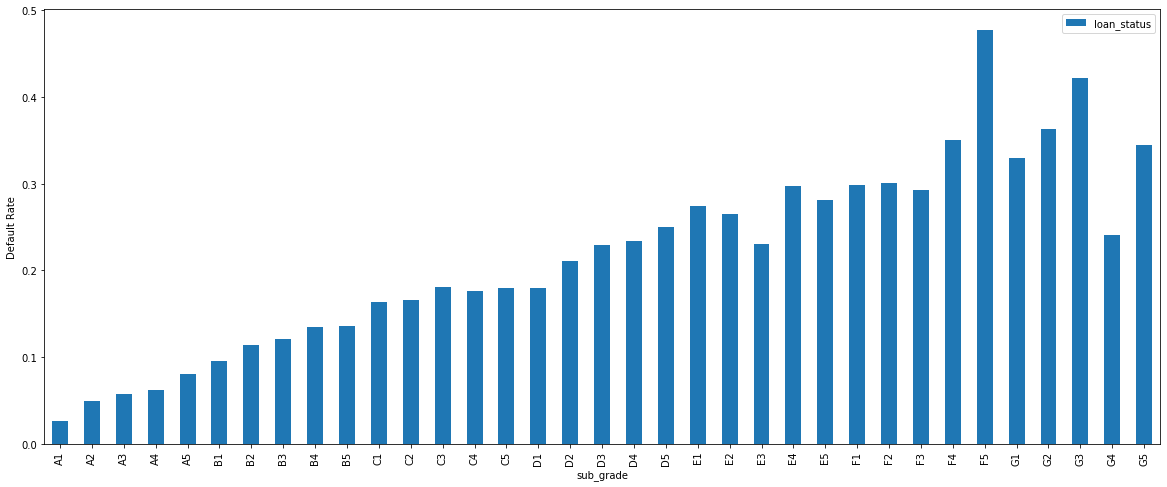

In [46]:
univariate_segmented("sub_grade",20,8)

Difference in information content:  0.16755376415369522
Max default rate: 0.2708095781071836


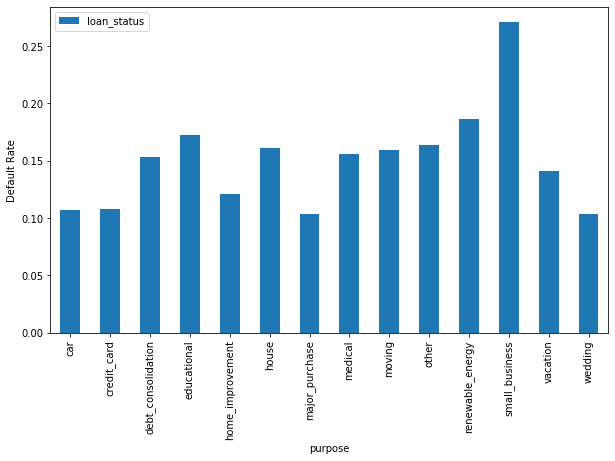

In [47]:
univariate_segmented("purpose",10,6)

Difference in information content:  0.14222913868197734
Max default rate: 0.25313785465668176


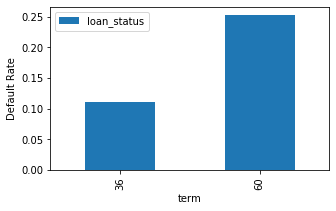

In [48]:
univariate_segmented("term",5,3)

Difference in information content:  0.31702357402259973
Max default rate: 0.38441558441558443


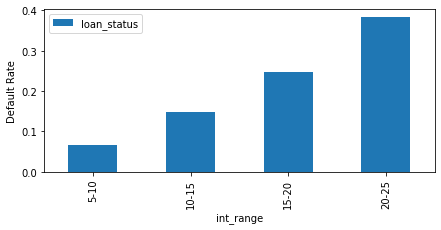

In [49]:
univariate_segmented("int_range",7,3)

Difference in information content:  0.09184197186168036
Max default rate: 0.2207163601161665


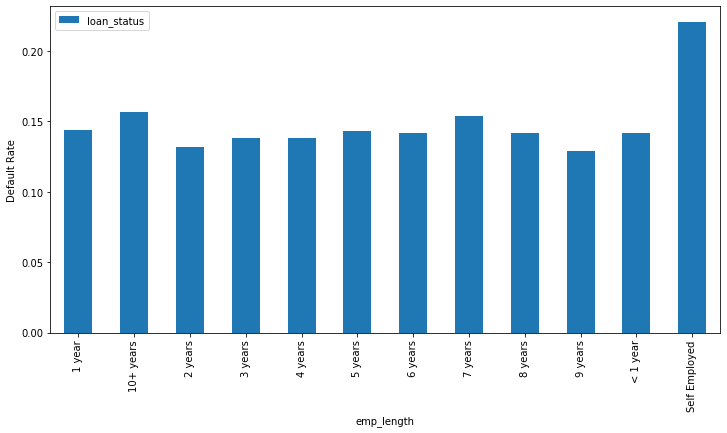

In [50]:
univariate_segmented("emp_length",12,6)

Difference in information content:  0.06510346717250566
Max default rate: 0.1697966079667295


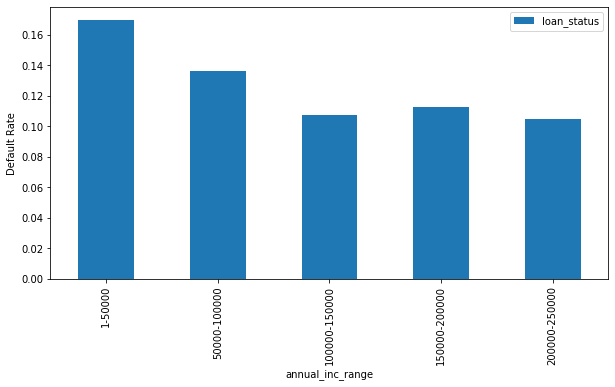

In [51]:
univariate_segmented("annual_inc_range",10,5)

Difference in information content:  0.1836734693877551
Max default rate: 0.1836734693877551


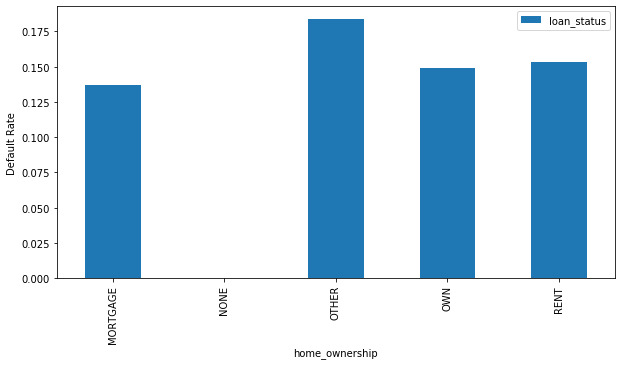

In [52]:
univariate_segmented("home_ownership",10,5)

Difference in information content:  0.039722543051679354
Max default rate: 0.16803211535310503


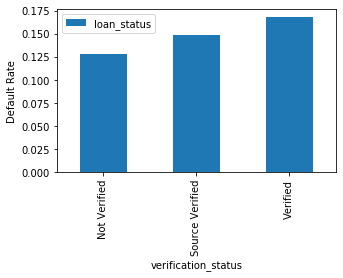

In [53]:
univariate_segmented("verification_status",5,3)

Difference in information content:  0.08070175438596491
Max default rate: 0.11578947368421053


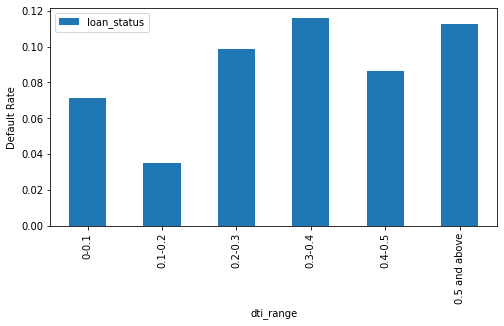

In [54]:
univariate_segmented("dti_range",8,4)

Difference in information content:  0.6
Max default rate: 0.6


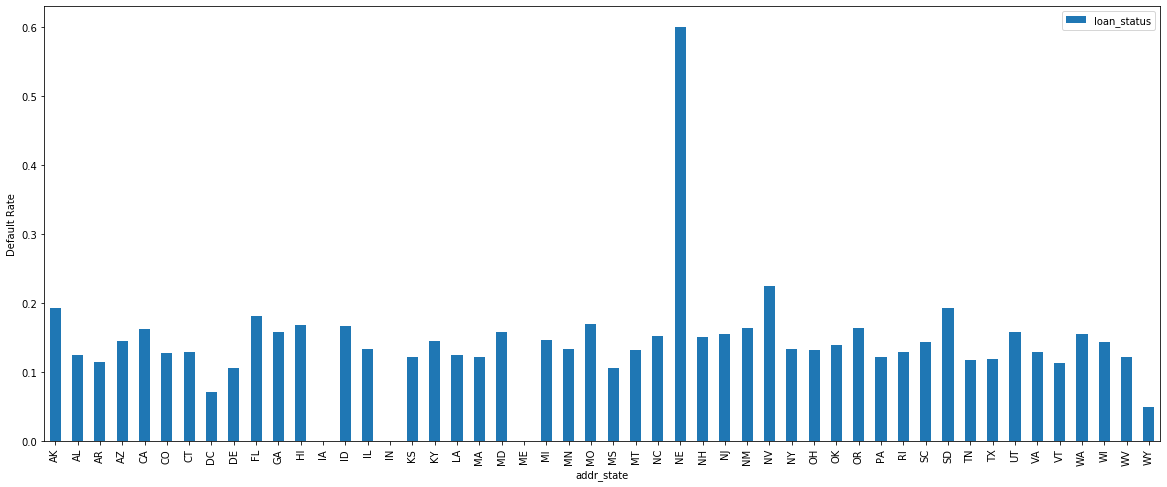

In [55]:
univariate_segmented("addr_state",20,8)

<b>[Analysis]:</b>
    
1. Applicants who have taken loan for small business are more likely to be defaulters.
2. Applicants who have annual income less than 50000 are more likely to default.  
3. As interest rate increases default rate increases.
4. Grade G applicants are more likely to default. Default Rate increases from grade A to G.
5. Default rate is high if loan is taken for longer term.
6. Applicants who have 10+ years or 1 year experience are more likely to default.

#### 3.3.1. Bivariate analysis on continuous variables

We will perform bivariate analysis with the help of correlation matrix and heatmap for all comtinuos variables

In [56]:
loan.corr()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
loan_amnt            1.000        0.982            0.938 0.347     0.301   
funded_amnt          0.982        1.000            0.956 0.325     0.305   
funded_amnt_inv      0.938        0.956            1.000 0.344     0.297   
term                 0.347        0.325            0.344 1.000     0.440   
int_rate             0.301        0.305            0.297 0.440     1.000   
annual_inc           0.412        0.408            0.390 0.070     0.069   
loan_status          0.059        0.056            0.038 0.173     0.211   
dti                  0.062        0.062            0.071 0.076     0.111   
issue_year           0.110        0.121            0.252 0.238     0.039   

                 annual_inc  loan_status    dti  issue_year  
loan_amnt             0.412        0.059  0.062       0.110  
funded_amnt           0.408        0.056  0.062       0.121  
funded_amnt_inv       0.390        0.038  0.071       0.252  
term                  0.070        0.173  0.076       0.238  
int_rate              0.069        0.211  0.111       0.039  
annual_inc            1.000       -0.062 -0.115       0.031  
loan_status          -0.062        1.000  0.045       0.024  
dti                  -0.115        0.045  1.000       0.093  
issue_year            0.031        0.024  0.093       1.000

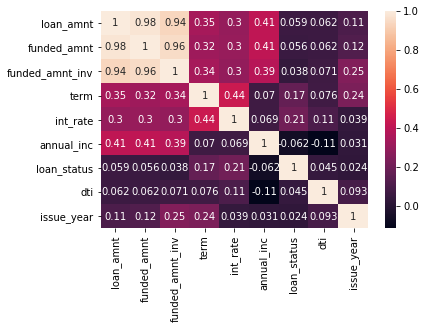

In [57]:
import matplotlib.pyplot as plt
sns.heatmap(loan.corr(), 
            xticklabels=loan.corr().columns.values
            ,yticklabels=loan.corr().columns.values,annot= True)
plt.show()

<b>[Insights]:</b> Loan amnt, Funded amnt and Funded amnt inv are positively correlated which means they are inter-related.

We will perform bivariate analysis with the help of pair plot for all continuos variables

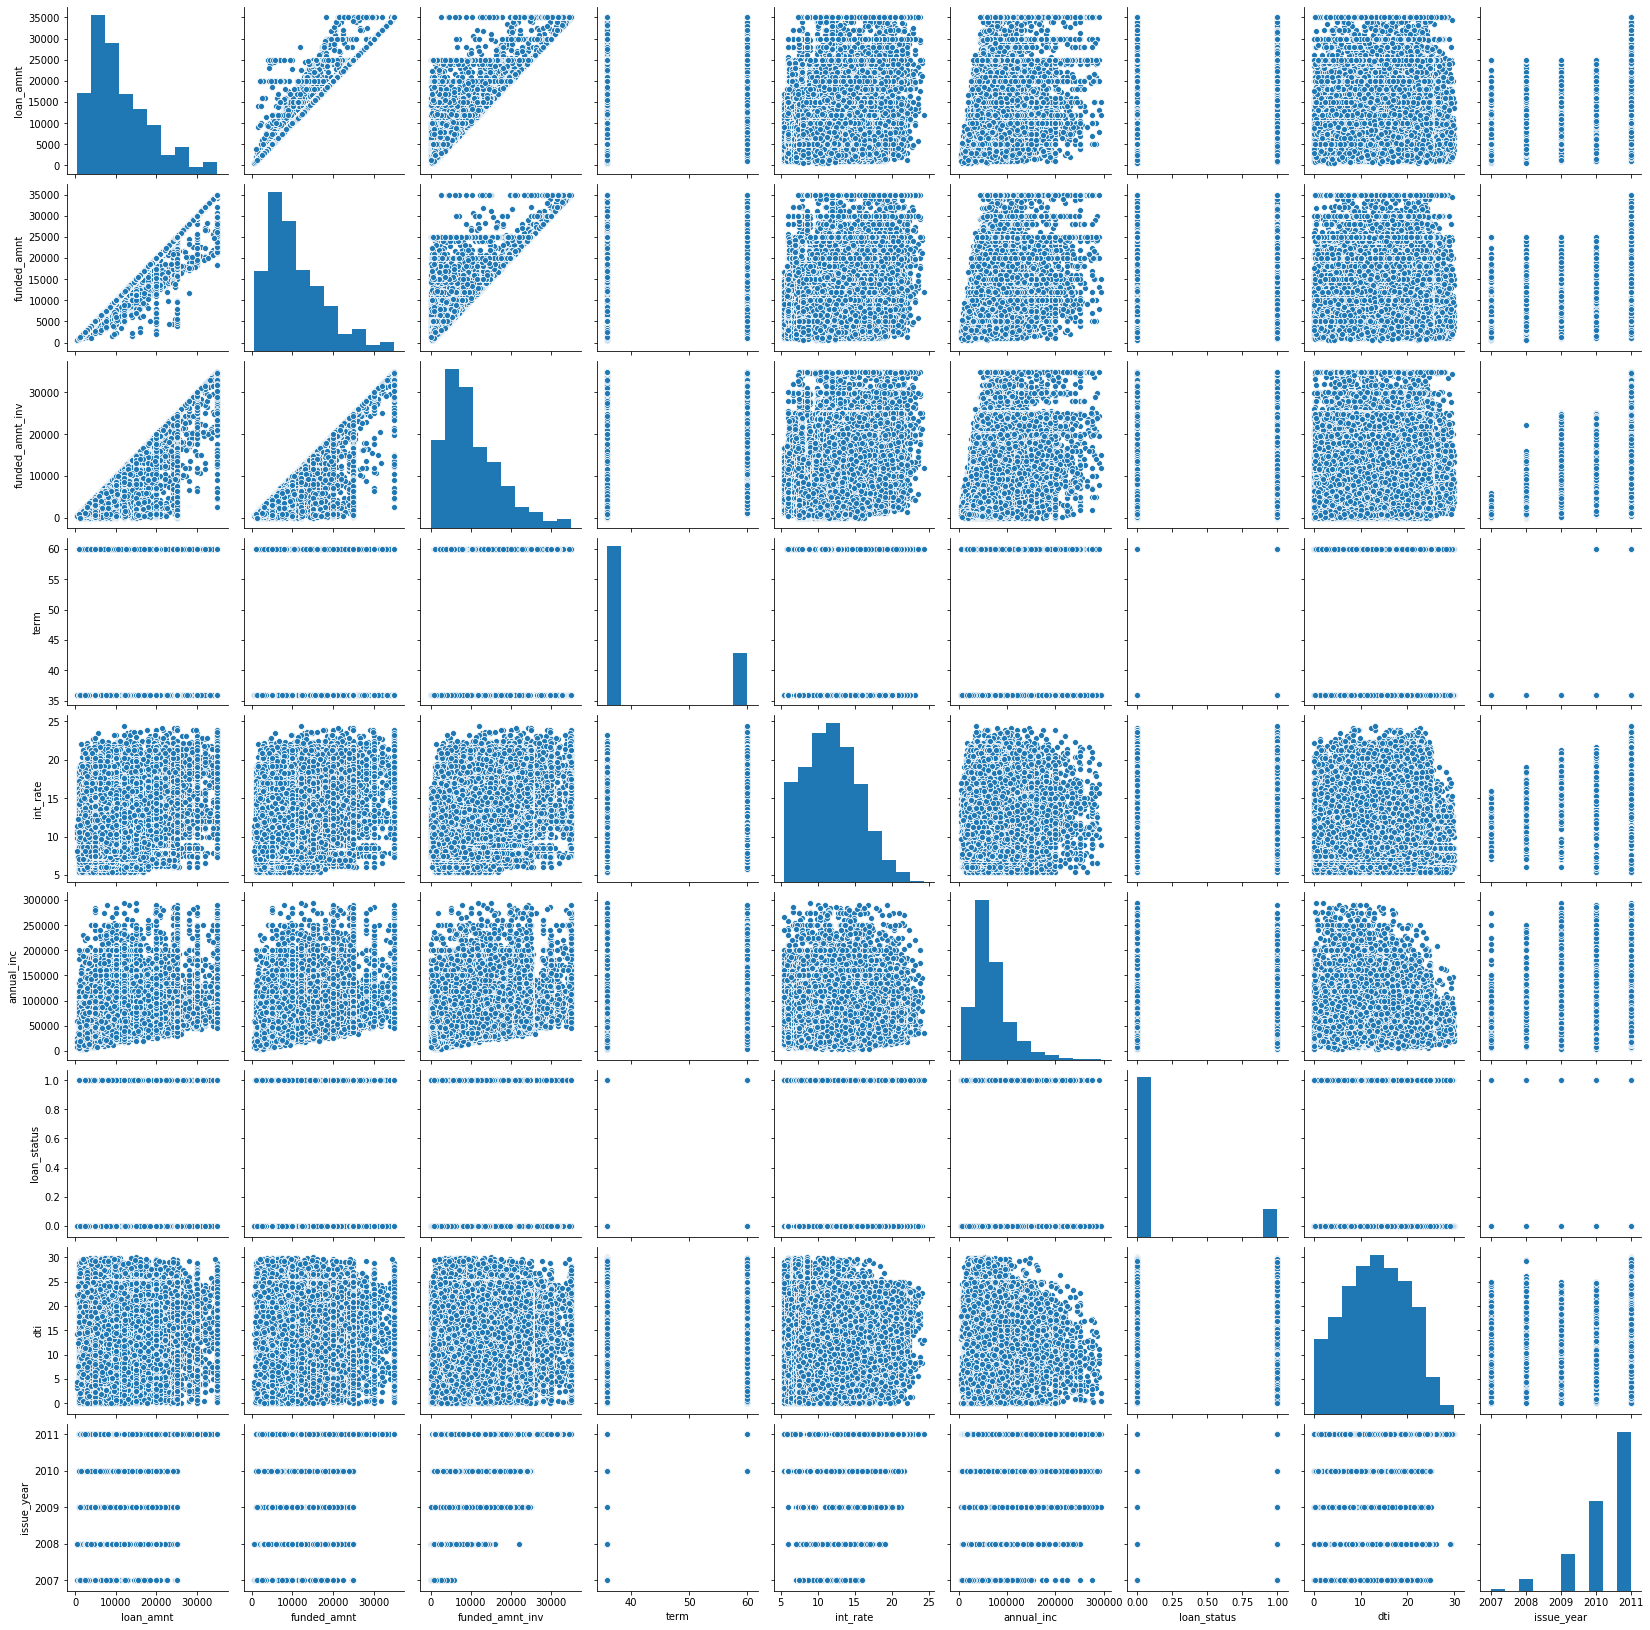

In [58]:
# Plot for numeric variables
sns.pairplot(loan)
plt.show()

<b>[Analysis]:</b>
Above analysis is not giving much conclusive facts about data.

#### 3.3.1. Bivariate analysis on categorical variables

We will analyse various combinations of two variables against default rate and obtained top 3 combinations based on Number of defaulters greater than 1500 for the combination. <br>

<b>Assumption:</b> Number of defaulters are considered because default rate is 1 even when there is only 1 defaulter applicant for the combination. <br>
Eg. Suppose Grade D3 and term 36mon has default rate 1. It is possible that there is only 1 applicant with this combination but default rate is still high hence number of defaulters is considered to extract top 3 combinations. <br>

 sub_grade vs grade


sub_grade grade  Default Rate  No. of Defaulters
9         B5     B         0.136                356
7         B3     B         0.121                341
10        C1     C         0.164                336
8         B4     B         0.135                329
11        C2     C         0.166                321
16        D2     D         0.211                271
12        C3     C         0.181                270
17        D3     D         0.229                256
6         B2     B         0.114                228
4         A5     A         0.080                217

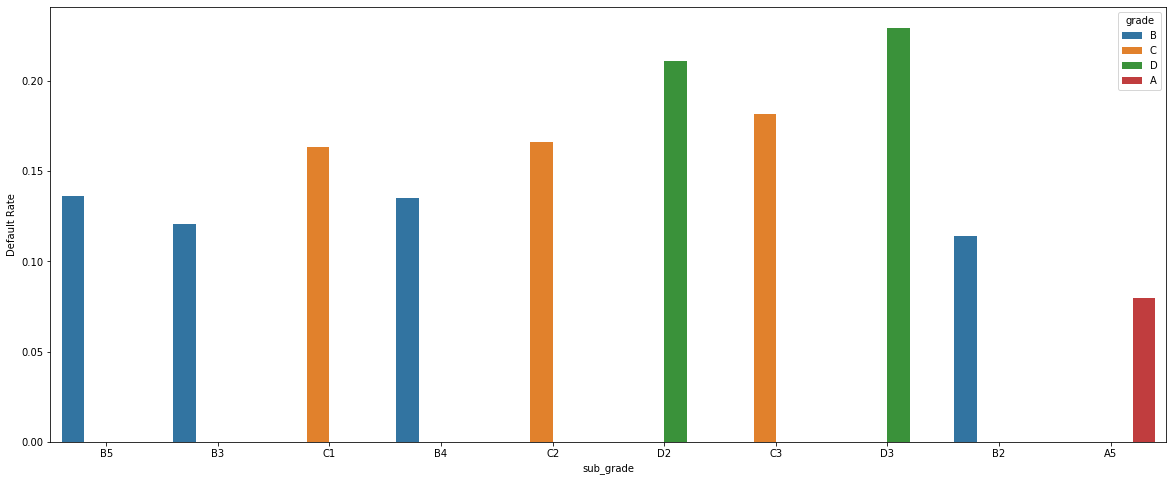

 sub_grade vs home_ownership


sub_grade home_ownership  Default Rate  No. of Defaulters
41        B5           RENT         0.146                190
49        C2           RENT         0.168                172
32        B3           RENT         0.124                169
45        C1           RENT         0.157                165
37        B4           RENT         0.128                153
68        D2           RENT         0.217                152
29        B3       MORTGAGE         0.119                146
33        B4       MORTGAGE         0.138                145
52        C3           RENT         0.183                140
42        C1       MORTGAGE         0.160                137

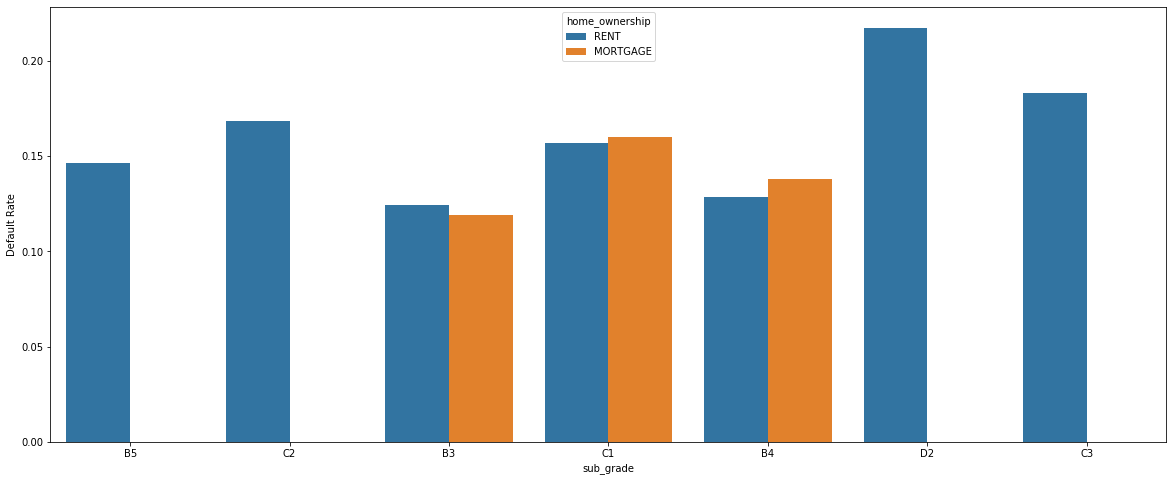

 sub_grade vs purpose


sub_grade             purpose  Default Rate  No. of Defaulters
127        B5  debt_consolidation         0.139                180
99         B3  debt_consolidation         0.122                157
155        C2  debt_consolidation         0.162                154
141        C1  debt_consolidation         0.149                144
113        B4  debt_consolidation         0.121                139
224        D2  debt_consolidation         0.201                137
169        C3  debt_consolidation         0.185                137
238        D3  debt_consolidation         0.220                130
252        D4  debt_consolidation         0.255                124
280        E1  debt_consolidation         0.272                111

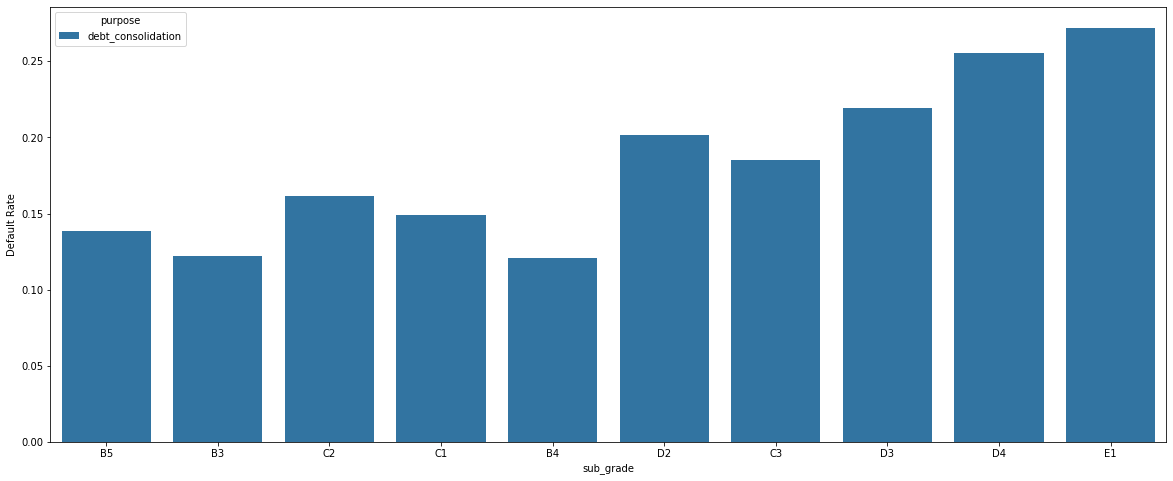

 sub_grade vs emp_length


sub_grade emp_length  Default Rate  No. of Defaulters
109        B5  10+ years         0.164                 91
121        C1  10+ years         0.192                 81
193        D2  10+ years         0.261                 73
133        C2  10+ years         0.183                 73
85         B3  10+ years         0.117                 73
97         B4  10+ years         0.133                 71
145        C3  10+ years         0.202                 65
205        D3  10+ years         0.266                 59
229        D5  10+ years         0.297                 58
217        D4  10+ years         0.258                 56

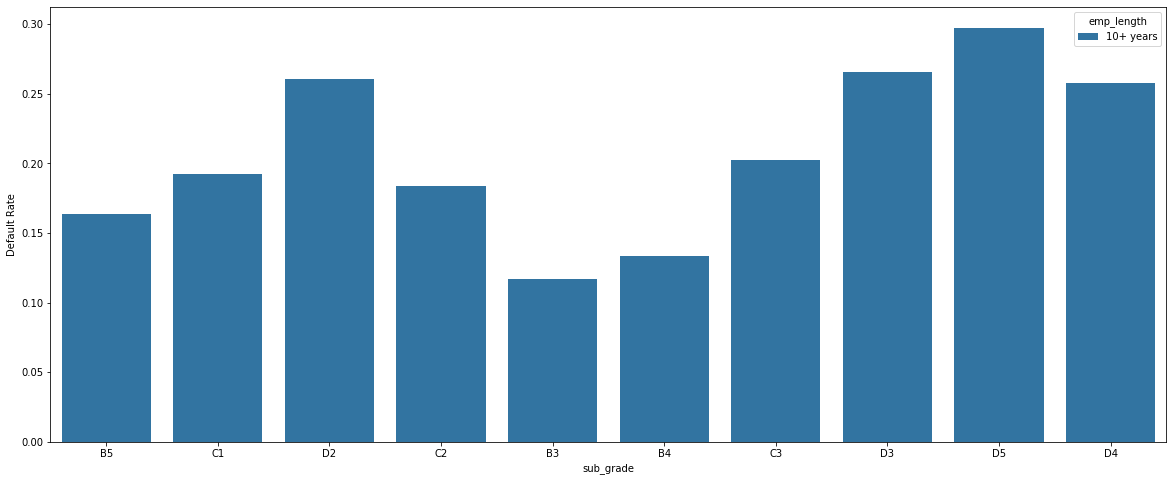

 sub_grade vs loan_amnt_range


sub_grade loan_amnt_range  Default Rate  No. of Defaulters
53        B5      5000-10000         0.140                114
59        C1      5000-10000         0.157                108
41        B3      5000-10000         0.122                105
65        C2      5000-10000         0.160                102
47        B4      5000-10000         0.127                 94
95        D2      5000-10000         0.204                 92
40        B3          0-5000         0.131                 89
58        C1          0-5000         0.168                 86
46        B4          0-5000         0.139                 84
35        B2      5000-10000         0.123                 83

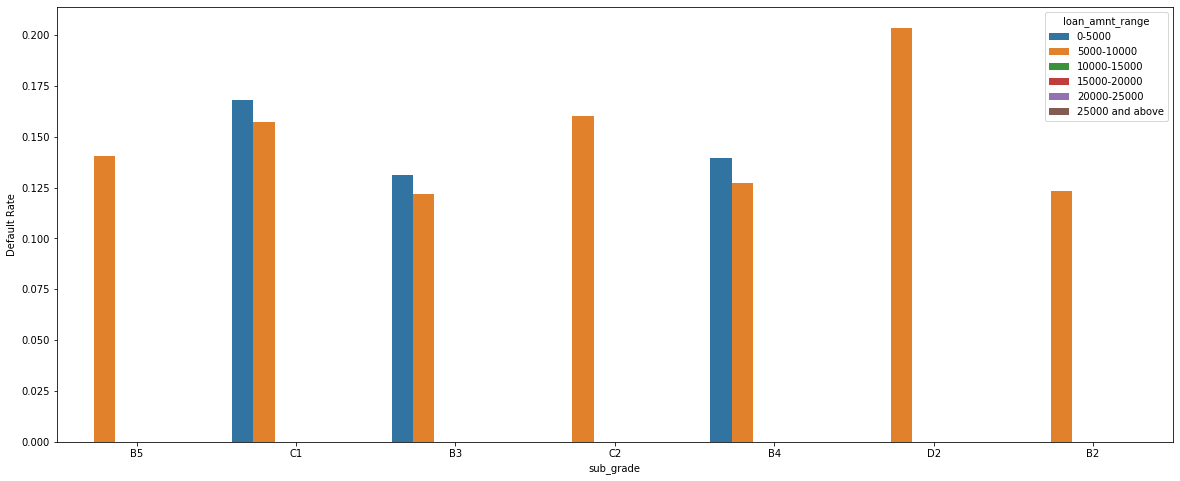

 sub_grade vs annual_inc_range


sub_grade annual_inc_range  Default Rate  No. of Defaulters
45        B5          1-50000         0.172                186
50        C1          1-50000         0.195                174
55        C2          1-50000         0.204                169
35        B3          1-50000         0.147                163
40        B4          1-50000         0.168                161
36        B3     50000-100000         0.114                151
46        B5     50000-100000         0.122                147
41        B4     50000-100000         0.122                140
60        C3          1-50000         0.217                134
51        C1     50000-100000         0.147                133

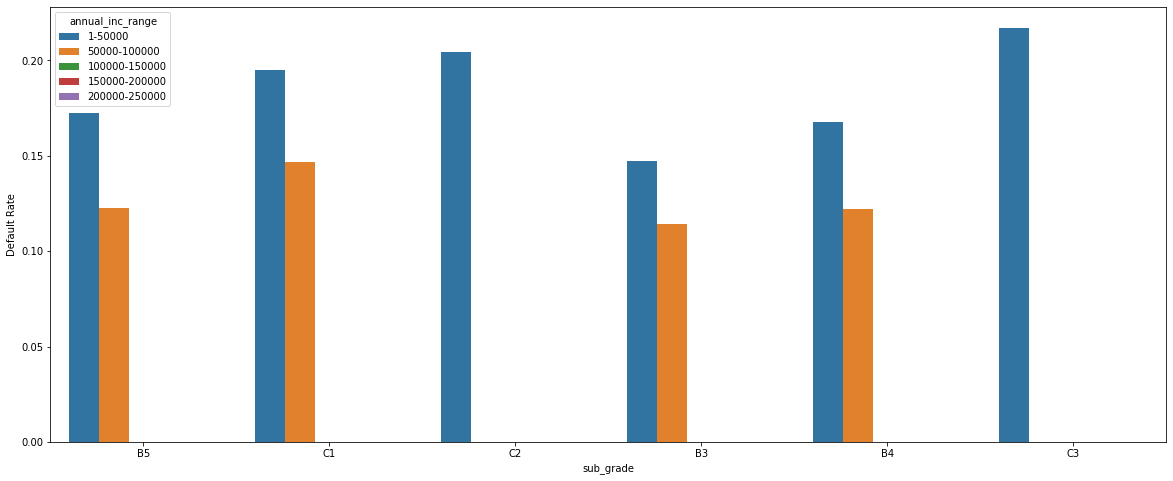

 sub_grade vs term


sub_grade  term  Default Rate  No. of Defaulters
13        B3    36         0.107                235
17        B5    36         0.116                229
15        B4    36         0.112                204
19        C1    36         0.135                199
7         A5    36         0.078                194
21        C2    36         0.139                187
23        C3    36         0.158                173
11        B2    36         0.100                172
5         A4    36         0.060                166
29        D1    36         0.176                162

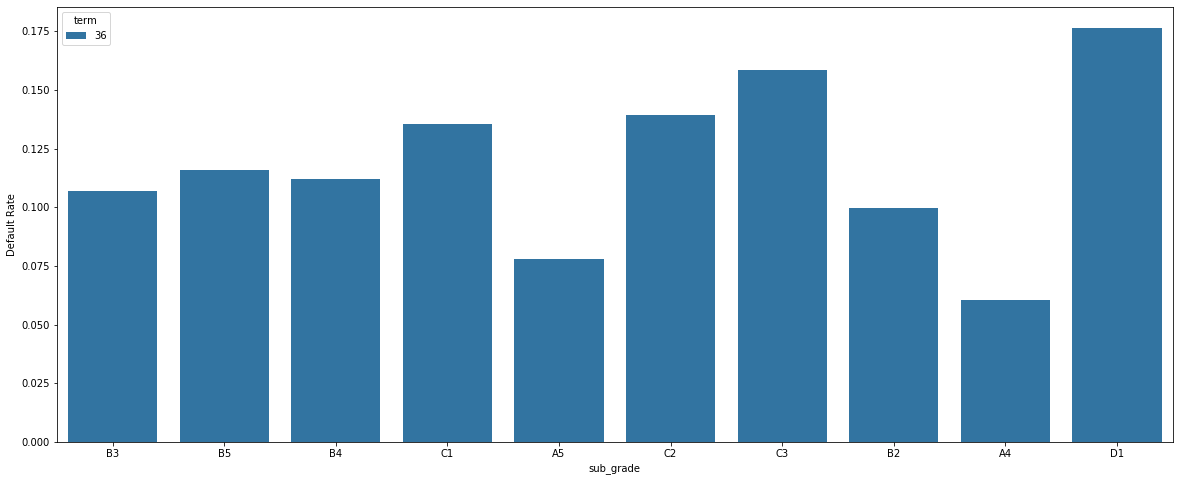

 sub_grade vs int_range


sub_grade int_range  Default Rate  No. of Defaulters
14        B5     10-15         0.136                354
15        C1     10-15         0.164                336
17        C2     10-15         0.166                321
10        B3     10-15         0.121                317
12        B4     10-15         0.137                299
18        C3     10-15         0.181                270
32        D3     15-20         0.240                219
4         A5      5-10         0.080                217
37        D5     15-20         0.251                203
34        D4     15-20         0.231                202

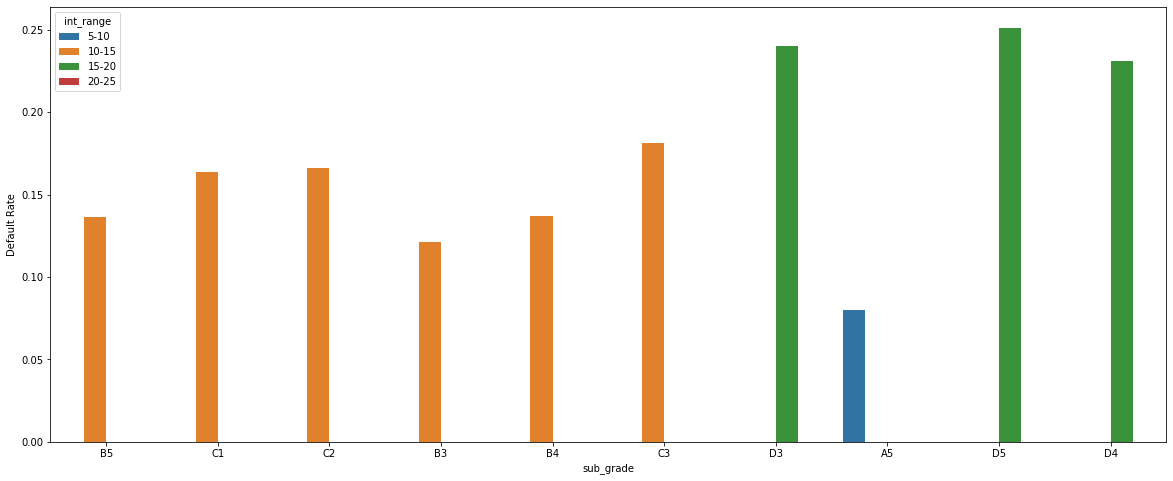

 sub_grade vs verification_status


sub_grade verification_status  Default Rate  No. of Defaulters
30        C1        Not Verified         0.162                145
24        B4        Not Verified         0.133                143
21        B3        Not Verified         0.111                137
29        B5            Verified         0.159                136
27        B5        Not Verified         0.123                136
36        C3        Not Verified         0.186                126
35        C2            Verified         0.189                121
33        C2        Not Verified         0.145                117
18        B2        Not Verified         0.115                116
32        C1            Verified         0.176                113

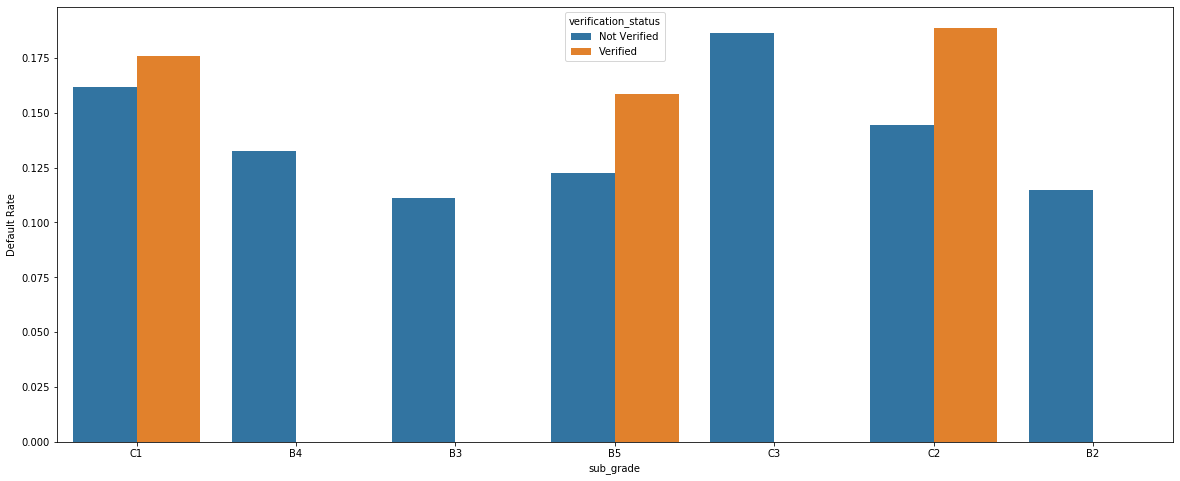

 grade vs home_ownership


grade home_ownership  Default Rate  No. of Defaulters
9      B           RENT         0.124                710
13     C           RENT         0.169                695
17     D           RENT         0.219                602
5      B       MORTGAGE         0.119                594
10     C       MORTGAGE         0.173                541
14     D       MORTGAGE         0.219                429
21     E           RENT         0.275                356
18     E       MORTGAGE         0.260                306
4      A           RENT         0.070                282
0      A       MORTGAGE         0.052                266

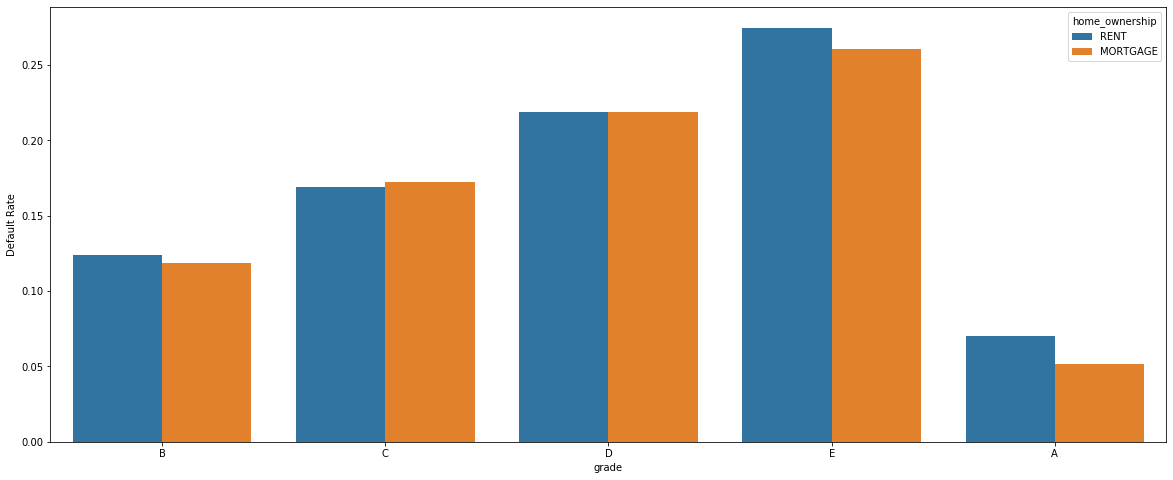

 grade vs purpose


grade             purpose  Default Rate  No. of Defaulters
30     C  debt_consolidation         0.167                638
16     B  debt_consolidation         0.116                636
44     D  debt_consolidation         0.218                590
58     E  debt_consolidation         0.272                406
2      A  debt_consolidation         0.063                243
72     F  debt_consolidation         0.358                199
37     C               other         0.203                169
23     B               other         0.138                162
15     B         credit_card         0.092                150
29     C         credit_card         0.137                143

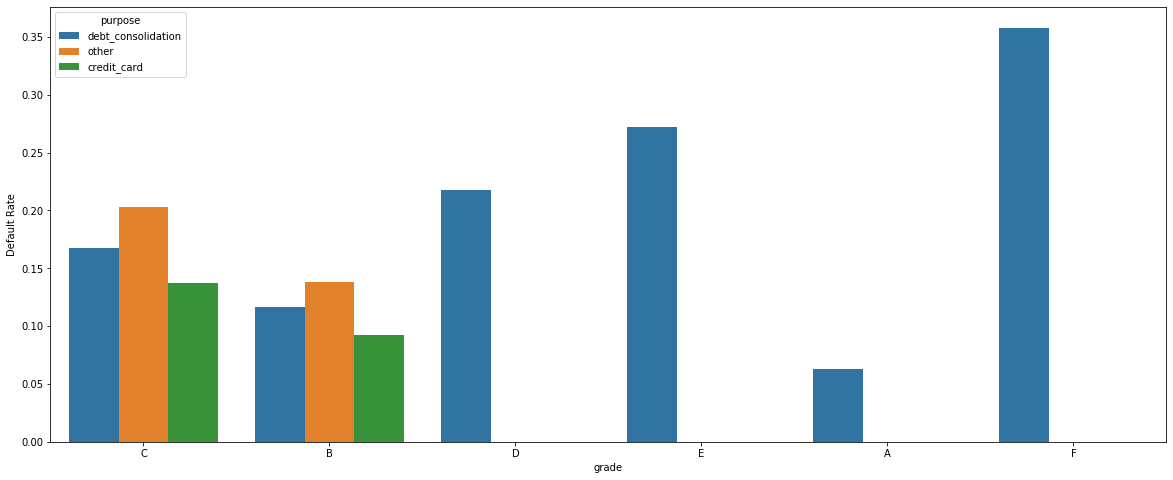

 grade vs emp_length


grade emp_length  Default Rate  No. of Defaulters
13     B  10+ years         0.125                318
25     C  10+ years         0.188                304
37     D  10+ years         0.251                274
49     E  10+ years         0.269                171
34     C   < 1 year         0.159                163
22     B   < 1 year         0.125                159
14     B    2 years         0.108                150
1      A  10+ years         0.062                142
27     C    3 years         0.163                139
26     C    2 years         0.155                135

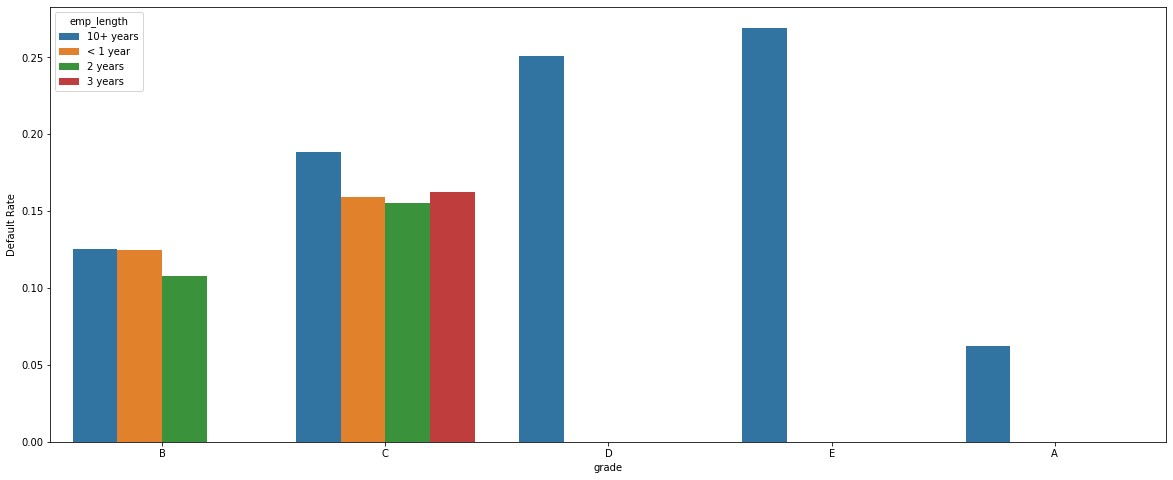

 grade vs loan_amnt_range


grade loan_amnt_range  Default Rate  No. of Defaulters
7      B      5000-10000         0.123                462
13     C      5000-10000         0.162                408
6      B          0-5000         0.127                369
12     C          0-5000         0.176                359
19     D      5000-10000         0.211                330
8      B     10000-15000         0.112                269
14     C     10000-15000         0.164                251
1      A      5000-10000         0.057                241
18     D          0-5000         0.230                237
20     D     10000-15000         0.208                226

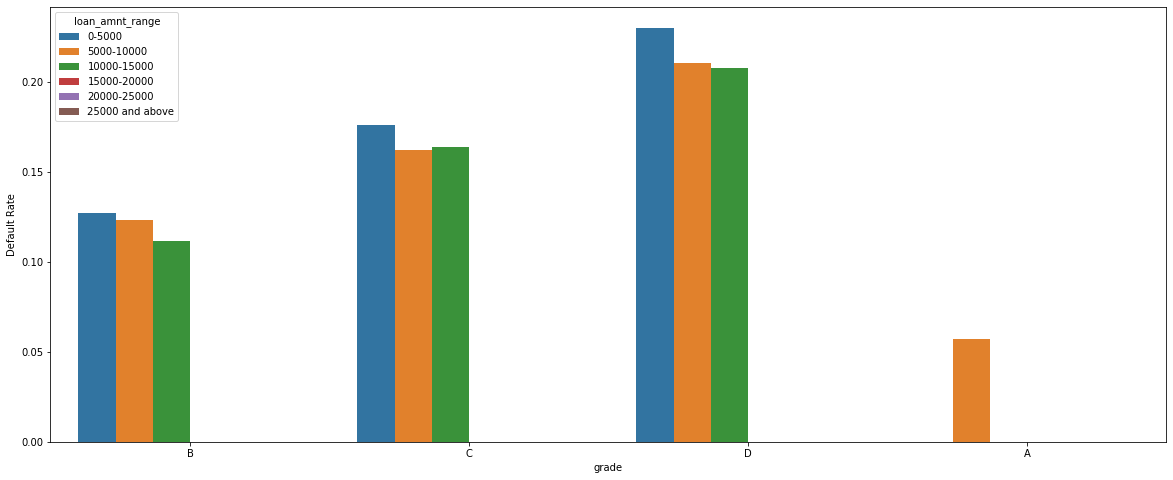

 grade vs annual_inc_range


grade annual_inc_range  Default Rate  No. of Defaulters
5      B          1-50000         0.150                719
10     C          1-50000         0.202                679
6      B     50000-100000         0.110                592
11     C     50000-100000         0.161                562
16     D     50000-100000         0.212                501
15     D          1-50000         0.245                498
0      A          1-50000         0.086                348
21     E     50000-100000         0.260                345
20     E          1-50000         0.310                260
1      A     50000-100000         0.046                218

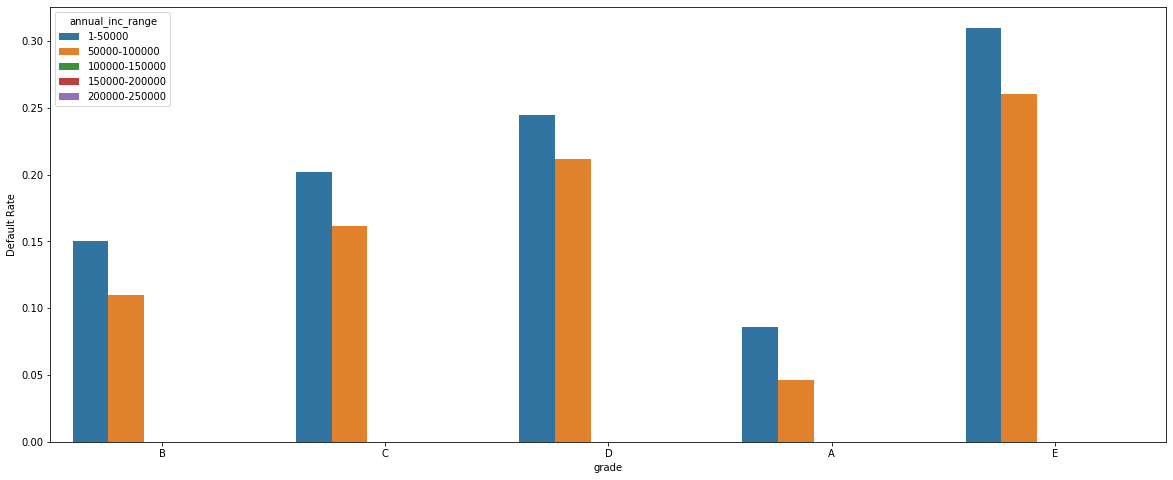

 grade vs term


grade  term  Default Rate  No. of Defaulters
2      B    36         0.106                985
4      C    36         0.147                844
6      D    36         0.180                580
0      A    36         0.059                565
9      E    60         0.300                539
7      D    60         0.290                538
5      C    60         0.241                503
3      B    60         0.188                440
11     F    60         0.344                263
8      E    36         0.203                176

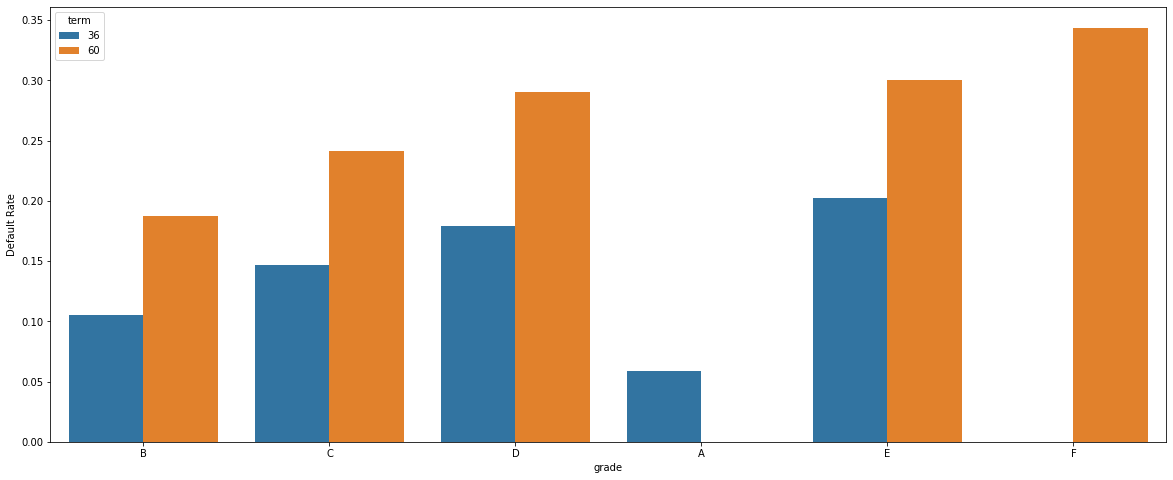

 grade vs int_range


grade int_range  Default Rate  No. of Defaulters
4      C     10-15         0.167               1217
2      B     10-15         0.127               1197
8      D     15-20         0.236                838
11     E     15-20         0.265                668
0      A      5-10         0.060                602
7      D     10-15         0.183                280
1      B      5-10         0.101                228
14     F     20-25         0.409                169
13     F     15-20         0.266                150
5      C     15-20         0.232                130

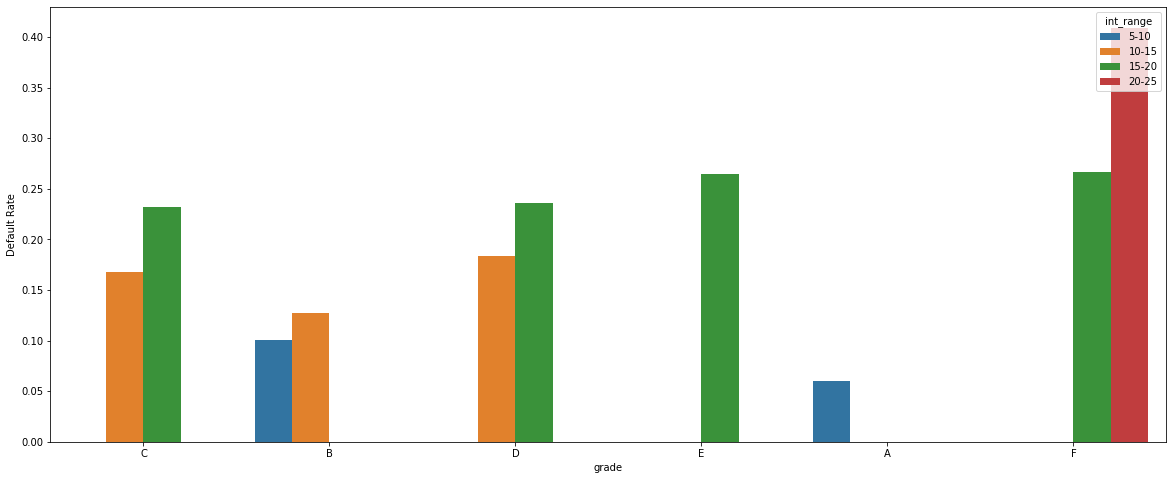

 grade vs verification_status


grade verification_status  Default Rate  No. of Defaulters
3      B        Not Verified         0.116                618
6      C        Not Verified         0.171                587
5      B            Verified         0.130                453
8      C            Verified         0.179                444
9      D        Not Verified         0.214                408
11     D            Verified         0.214                399
14     E            Verified         0.282                370
4      B     Source Verified         0.123                354
7      C     Source Verified         0.165                316
0      A        Not Verified         0.061                316

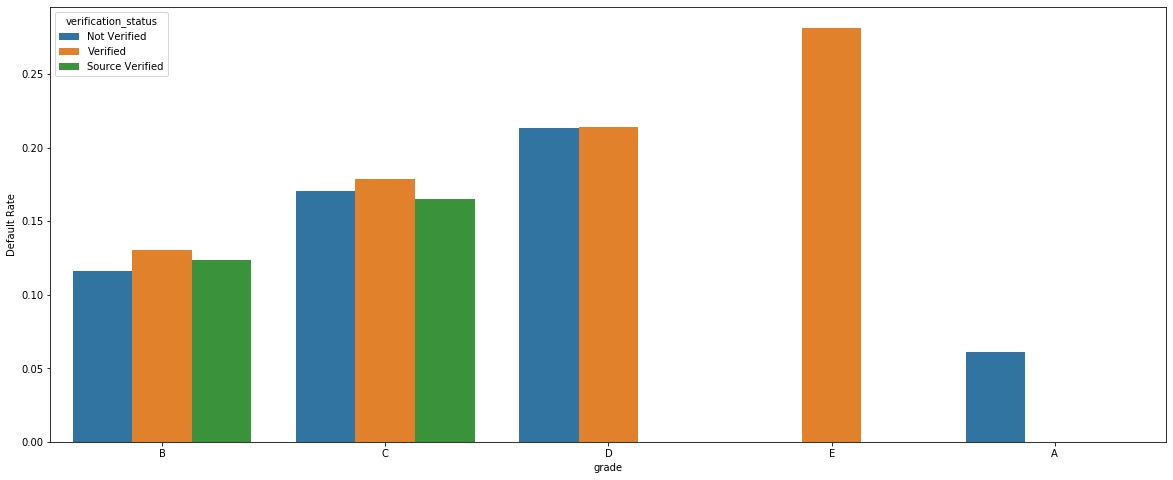

 home_ownership vs purpose


home_ownership             purpose  Default Rate  No. of Defaulters
45           RENT  debt_consolidation         0.153               1421
2        MORTGAGE  debt_consolidation         0.153               1145
52           RENT               other         0.185                384
44           RENT         credit_card         0.107                269
4        MORTGAGE    home_improvement         0.116                266
1        MORTGAGE         credit_card         0.106                234
54           RENT      small_business         0.299                222
11       MORTGAGE      small_business         0.238                214
31            OWN  debt_consolidation         0.152                194
9        MORTGAGE               other         0.133                187

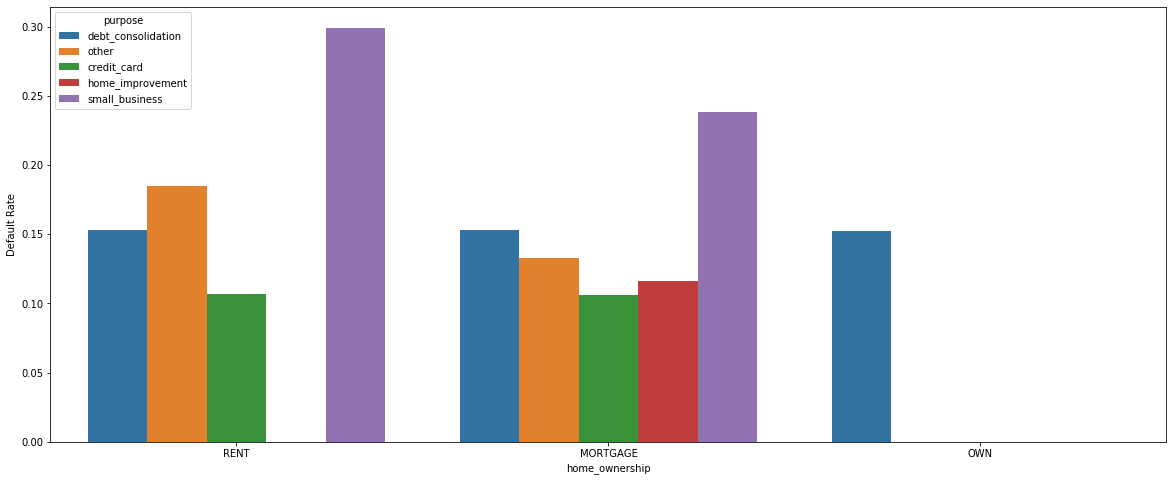

 home_ownership vs emp_length


home_ownership emp_length  Default Rate  No. of Defaulters
1        MORTGAGE  10+ years         0.142                753
37           RENT  10+ years         0.194                474
46           RENT   < 1 year         0.142                408
38           RENT    2 years         0.135                348
39           RENT    3 years         0.141                312
36           RENT     1 year         0.144                287
40           RENT    4 years         0.148                258
41           RENT    5 years         0.147                224
3        MORTGAGE    3 years         0.132                202
5        MORTGAGE    5 years         0.137                197

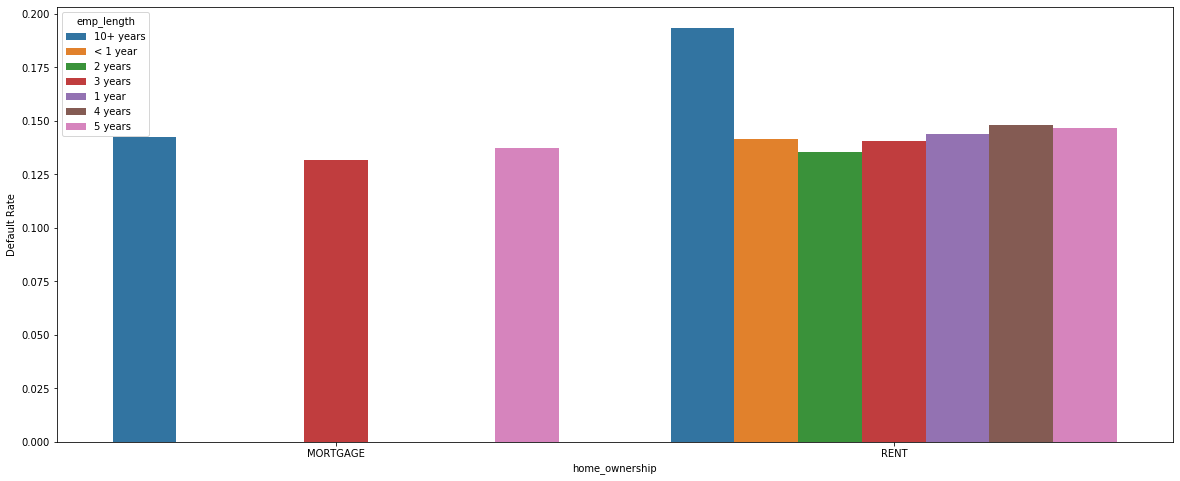

 home_ownership vs loan_amnt_range


home_ownership loan_amnt_range  Default Rate  No. of Defaulters
20           RENT      5000-10000         0.140                912
19           RENT          0-5000         0.151                801
1        MORTGAGE      5000-10000         0.113                594
21           RENT     10000-15000         0.143                497
2        MORTGAGE     10000-15000         0.132                478
0        MORTGAGE          0-5000         0.117                384
3        MORTGAGE     15000-20000         0.162                363
22           RENT     15000-20000         0.178                324
4        MORTGAGE     20000-25000         0.180                298
23           RENT     20000-25000         0.215                210

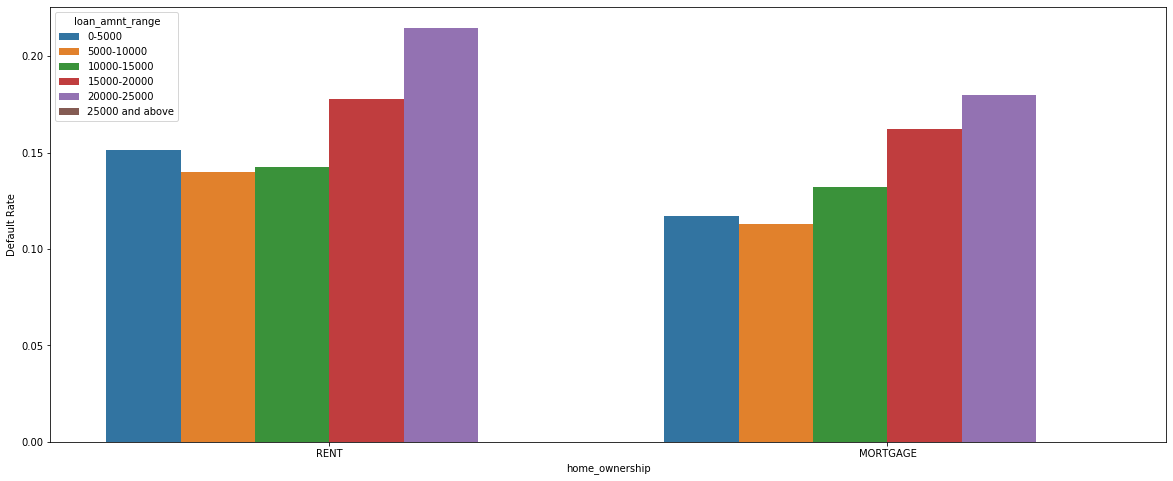

 home_ownership vs annual_inc_range


home_ownership annual_inc_range  Default Rate  No. of Defaulters
18           RENT          1-50000         0.173               1669
1        MORTGAGE     50000-100000         0.139               1289
19           RENT     50000-100000         0.133                999
0        MORTGAGE          1-50000         0.165                669
2        MORTGAGE    100000-150000         0.100                276
13            OWN          1-50000         0.165                268
14            OWN     50000-100000         0.139                148
20           RENT    100000-150000         0.126                128
3        MORTGAGE    150000-200000         0.110                 69
21           RENT    150000-200000         0.137                 31

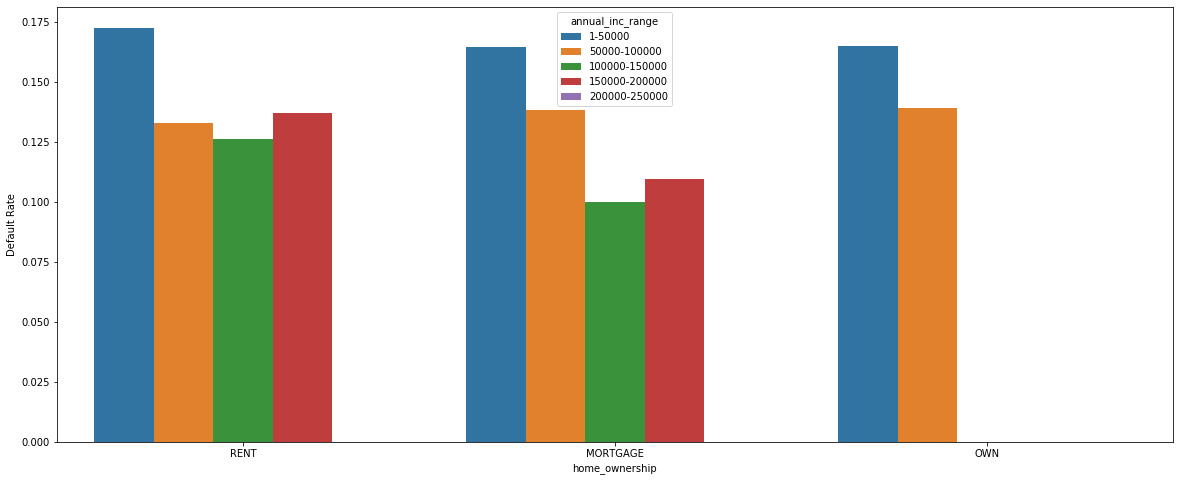

 home_ownership vs term


home_ownership  term  Default Rate  No. of Defaulters
7           RENT    36         0.121               1777
0       MORTGAGE    36         0.098               1181
1       MORTGAGE    60         0.228               1146
8           RENT    60         0.280               1062
5            OWN    36         0.110                252
6            OWN    60         0.283                191
3          OTHER    36         0.175                 17
4          OTHER    60         1.000                  1
2           NONE    36         0.000                  0

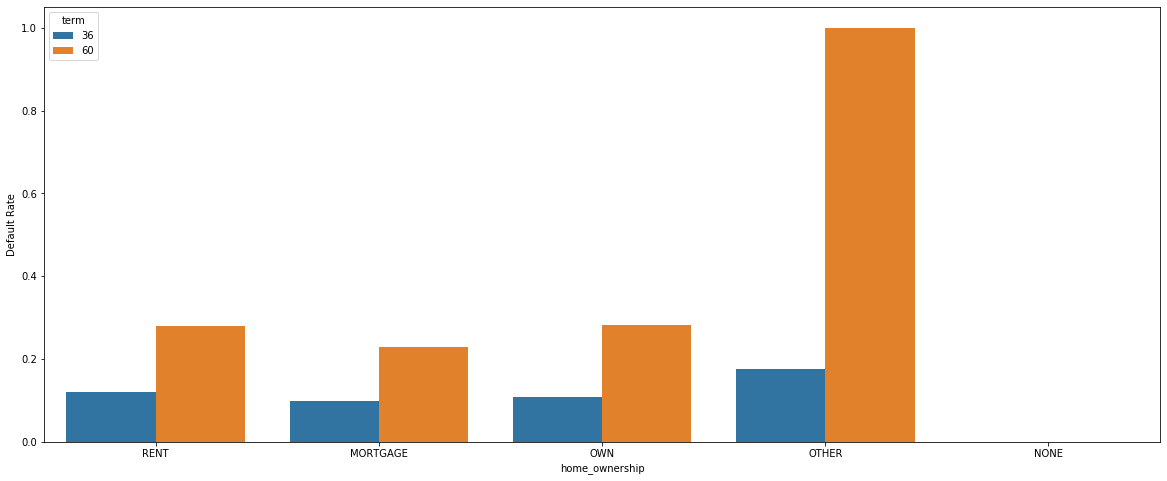

 home_ownership vs int_range


home_ownership int_range  Default Rate  No. of Defaulters
13           RENT     10-15         0.149               1395
1        MORTGAGE     10-15         0.146               1089
14           RENT     15-20         0.251                917
2        MORTGAGE     15-20         0.242                739
12           RENT      5-10         0.076                392
0        MORTGAGE      5-10         0.060                365
9             OWN     10-15         0.156                214
15           RENT     20-25         0.403                135
3        MORTGAGE     20-25         0.352                134
10            OWN     15-20         0.256                131

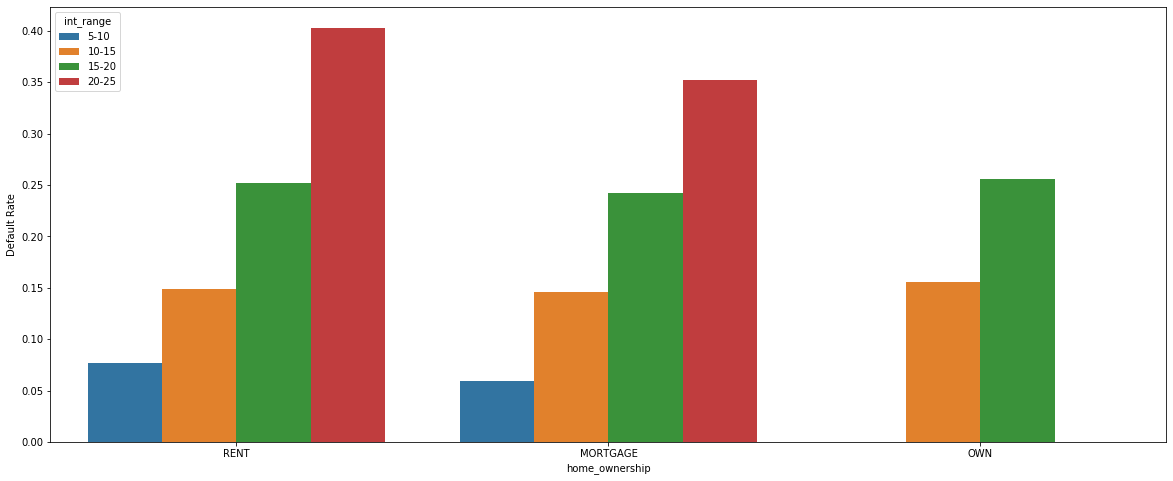

 home_ownership vs verification_status


home_ownership verification_status  Default Rate  No. of Defaulters
10           RENT        Not Verified         0.134               1109
2        MORTGAGE            Verified         0.160               1002
12           RENT            Verified         0.176                903
0        MORTGAGE        Not Verified         0.121                836
11           RENT     Source Verified         0.162                827
1        MORTGAGE     Source Verified         0.128                489
7             OWN        Not Verified         0.128                187
9             OWN            Verified         0.180                139
8             OWN     Source Verified         0.158                117
4           OTHER        Not Verified         0.192                 10

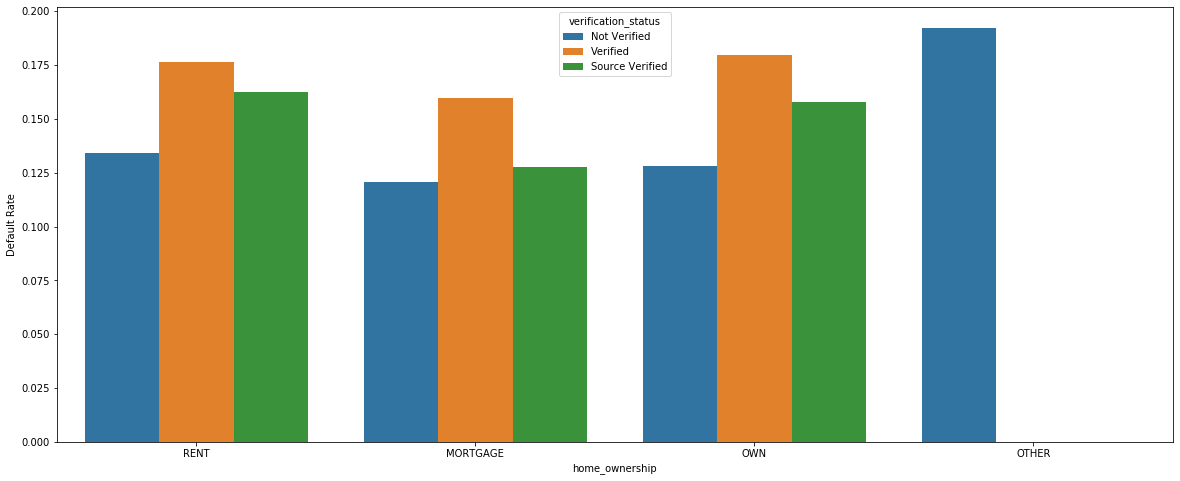

 purpose vs emp_length


purpose emp_length  Default Rate  No. of Defaulters
25   debt_consolidation  10+ years         0.174                704
34   debt_consolidation   < 1 year         0.145                292
26   debt_consolidation    2 years         0.136                274
27   debt_consolidation    3 years         0.141                264
29   debt_consolidation    5 years         0.145                222
28   debt_consolidation    4 years         0.135                211
24   debt_consolidation     1 year         0.148                209
30   debt_consolidation    6 years         0.155                168
109               other  10+ years         0.172                142
31   debt_consolidation    7 years         0.161                134

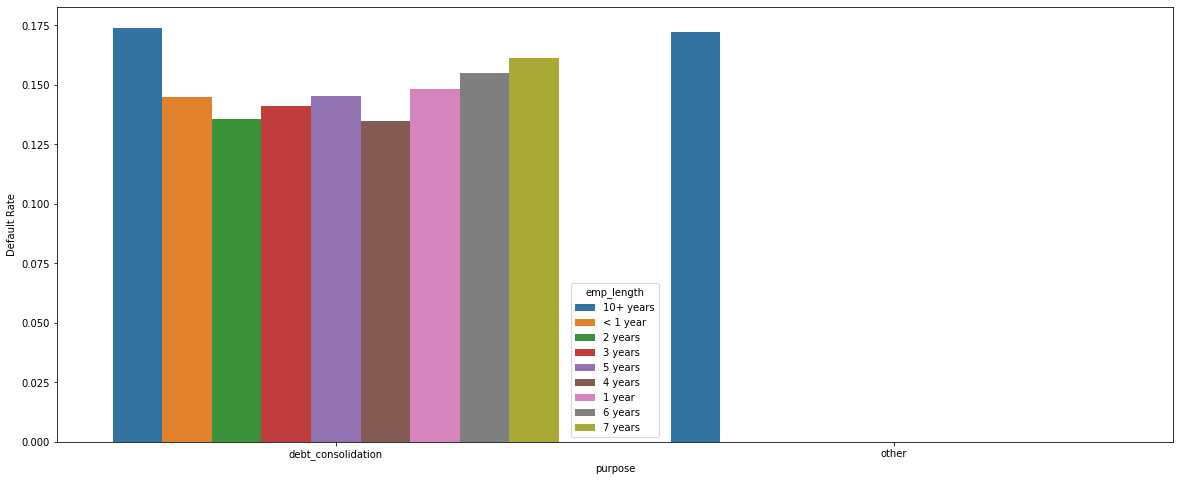

 purpose vs loan_amnt_range


purpose  loan_amnt_range  Default Rate  No. of Defaulters
13  debt_consolidation       5000-10000         0.133                771
14  debt_consolidation      10000-15000         0.138                599
15  debt_consolidation      15000-20000         0.178                465
12  debt_consolidation           0-5000         0.152                432
16  debt_consolidation      20000-25000         0.184                302
53               other           0-5000         0.171                298
17  debt_consolidation  25000 and above         0.237                198
54               other       5000-10000         0.147                181
7          credit_card       5000-10000         0.097                172
8          credit_card      10000-15000         0.104                125

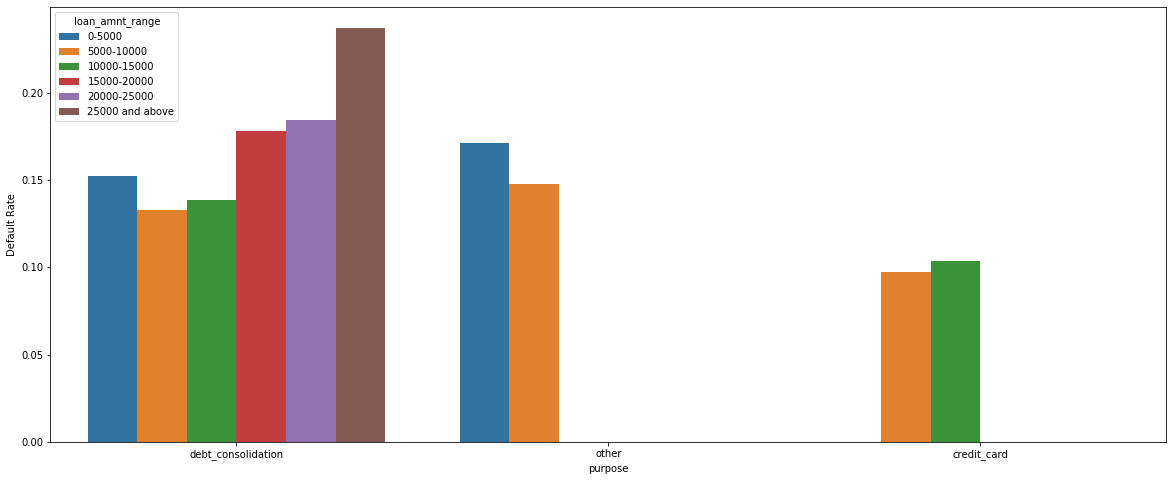

 purpose vs annual_inc_range


purpose annual_inc_range  Default Rate  No. of Defaulters
11  debt_consolidation     50000-100000         0.145               1253
10  debt_consolidation          1-50000         0.174               1252
45               other          1-50000         0.189                346
5          credit_card          1-50000         0.132                244
6          credit_card     50000-100000         0.098                237
56      small_business     50000-100000         0.280                236
46               other     50000-100000         0.137                218
12  debt_consolidation    100000-150000         0.116                198
55      small_business          1-50000         0.298                182
21    home_improvement     50000-100000         0.128                182

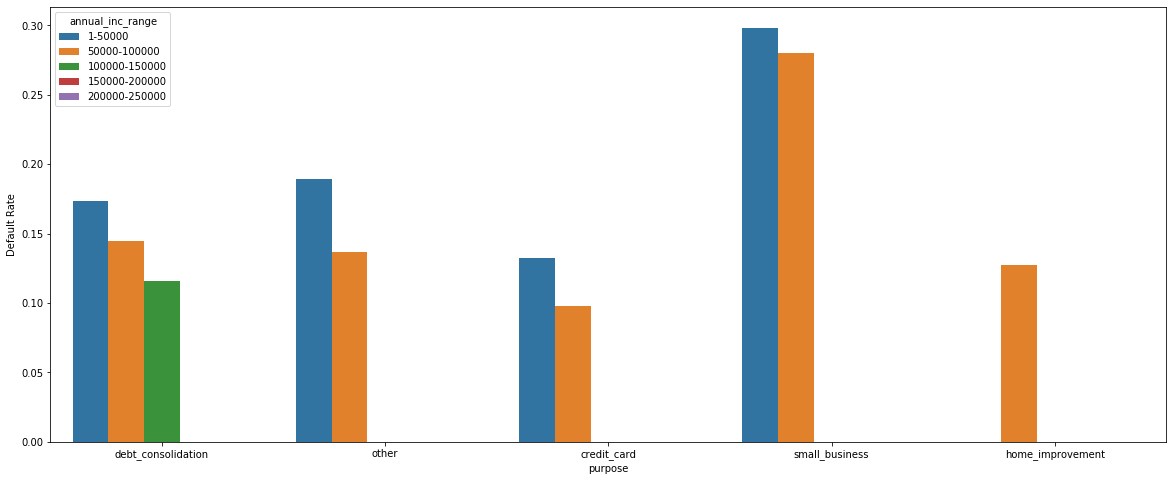

 purpose vs term


purpose  term  Default Rate  No. of Defaulters
4   debt_consolidation    36         0.112               1469
5   debt_consolidation    60         0.264               1298
18               other    36         0.132                414
2          credit_card    36         0.078                318
22      small_business    36         0.217                269
3          credit_card    60         0.239                224
19               other    60         0.301                219
23      small_business    60         0.400                206
8     home_improvement    36         0.099                205
9     home_improvement    60         0.178                142

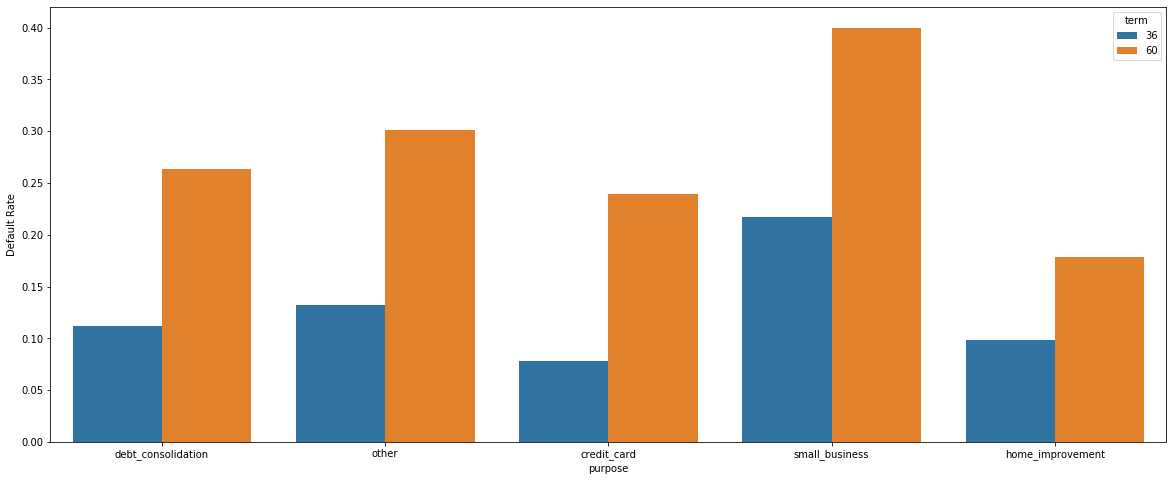

 purpose vs int_range


purpose int_range  Default Rate  No. of Defaulters
9   debt_consolidation     10-15         0.144               1266
10  debt_consolidation     15-20         0.252                989
8   debt_consolidation      5-10         0.068                334
37               other     10-15         0.161                307
5          credit_card     10-15         0.118                289
45      small_business     10-15         0.291                225
38               other     15-20         0.300                188
17    home_improvement     10-15         0.144                181
11  debt_consolidation     20-25         0.392                178
46      small_business     15-20         0.325                151

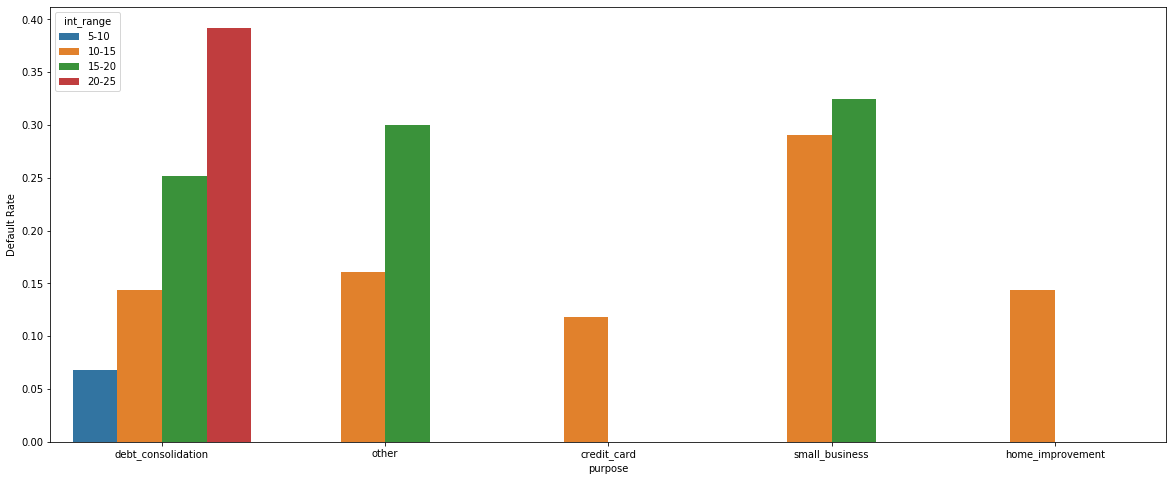

 purpose vs verification_status


purpose verification_status  Default Rate  No. of Defaulters
8   debt_consolidation            Verified         0.179               1142
6   debt_consolidation        Not Verified         0.130                941
7   debt_consolidation     Source Verified         0.154                684
27               other        Not Verified         0.156                317
35      small_business            Verified         0.303                204
5          credit_card            Verified         0.127                203
3          credit_card        Not Verified         0.090                202
29               other            Verified         0.178                165
33      small_business        Not Verified         0.247                161
28               other     Source Verified         0.167                151

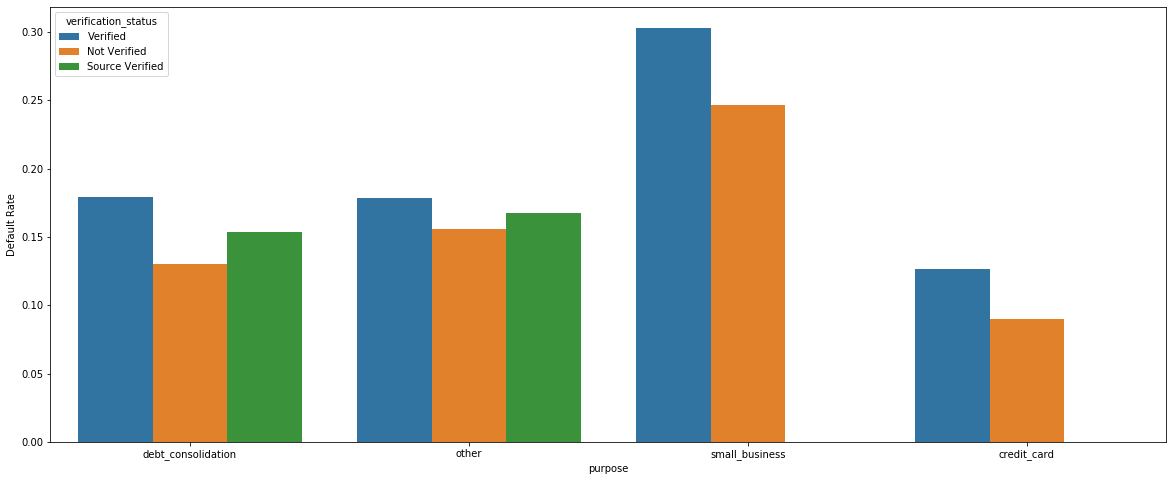

 emp_length vs loan_amnt_range


emp_length loan_amnt_range  Default Rate  No. of Defaulters
7   10+ years      5000-10000         0.130                323
8   10+ years     10000-15000         0.142                250
9   10+ years     15000-20000         0.195                228
6   10+ years          0-5000         0.132                215
61   < 1 year      5000-10000         0.134                208
60   < 1 year          0-5000         0.137                195
10  10+ years     20000-25000         0.201                181
13    2 years      5000-10000         0.111                170
12    2 years          0-5000         0.138                163
31    5 years      5000-10000         0.142                157

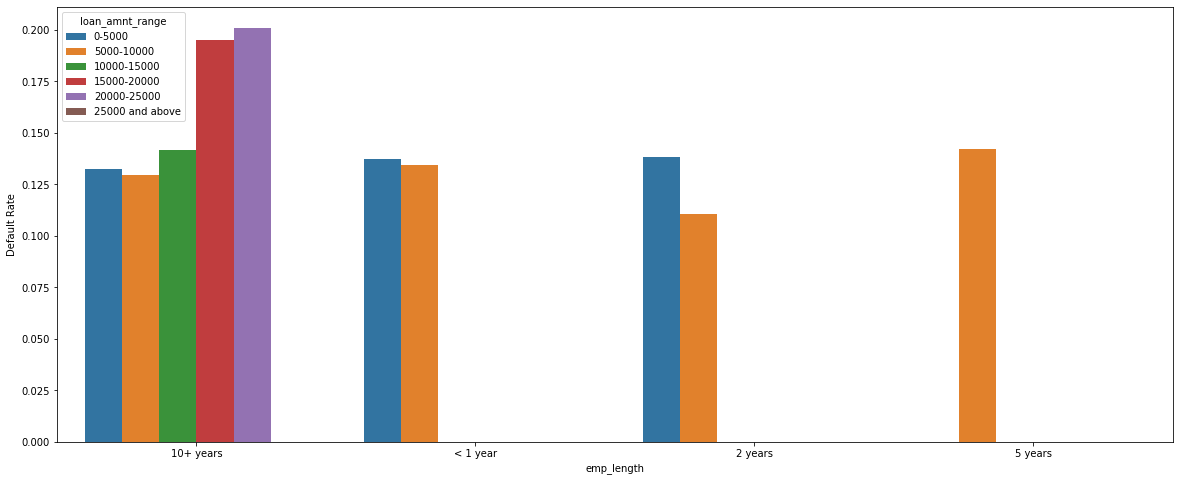

 emp_length vs annual_inc_range


emp_length annual_inc_range  Default Rate  No. of Defaulters
6   10+ years     50000-100000         0.160                768
5   10+ years          1-50000         0.190                386
50   < 1 year          1-50000         0.165                385
10    2 years          1-50000         0.158                324
15    3 years          1-50000         0.155                265
0      1 year          1-50000         0.164                251
16    3 years     50000-100000         0.134                241
20    4 years          1-50000         0.163                227
25    5 years          1-50000         0.158                207
26    5 years     50000-100000         0.133                198

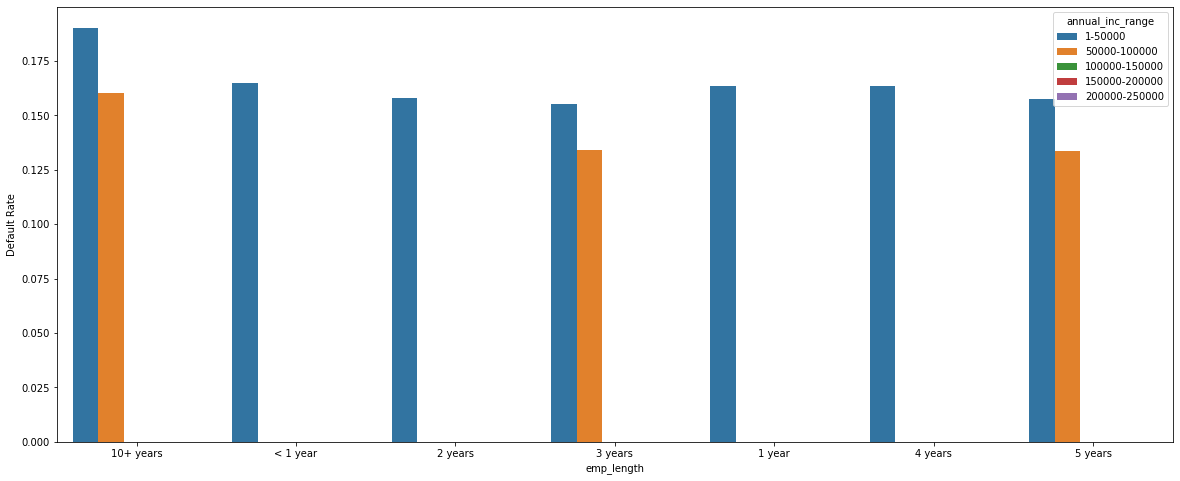

 emp_length vs term


emp_length  term  Default Rate  No. of Defaulters
3   10+ years    60         0.265                701
2   10+ years    36         0.108                630
20   < 1 year    36         0.117                429
4     2 years    36         0.104                356
6     3 years    36         0.107                332
0      1 year    36         0.117                302
8     4 years    36         0.109                279
10    5 years    36         0.107                251
7     3 years    60         0.242                223
5     2 years    60         0.240                211

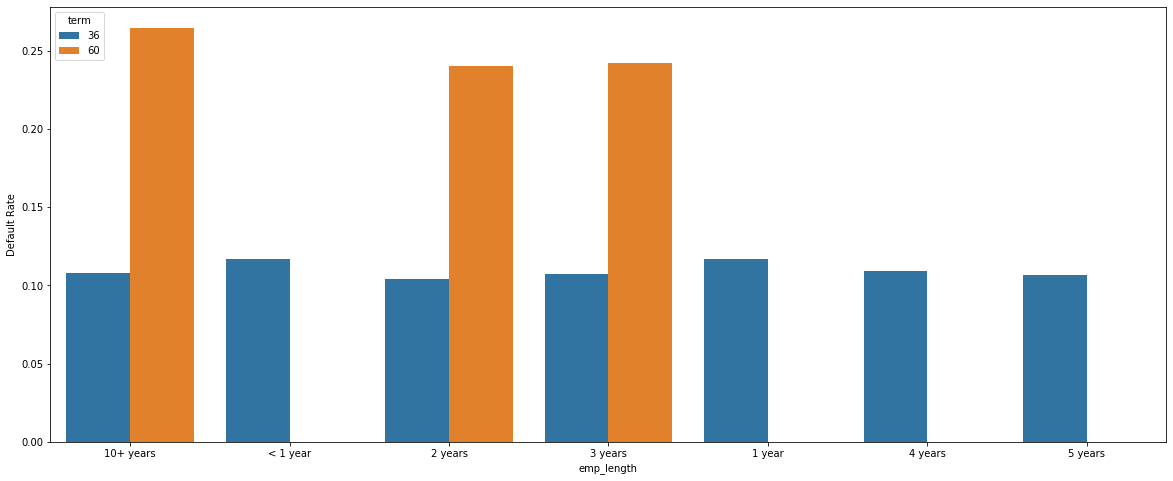

 emp_length vs int_range


emp_length int_range  Default Rate  No. of Defaulters
5   10+ years     10-15         0.159                609
6   10+ years     15-20         0.269                450
41   < 1 year     10-15         0.147                325
9     2 years     10-15         0.137                293
13    3 years     10-15         0.138                276
1      1 year     10-15         0.145                238
21    5 years     10-15         0.149                218
17    4 years     10-15         0.127                200
14    3 years     15-20         0.256                188
10    2 years     15-20         0.231                185

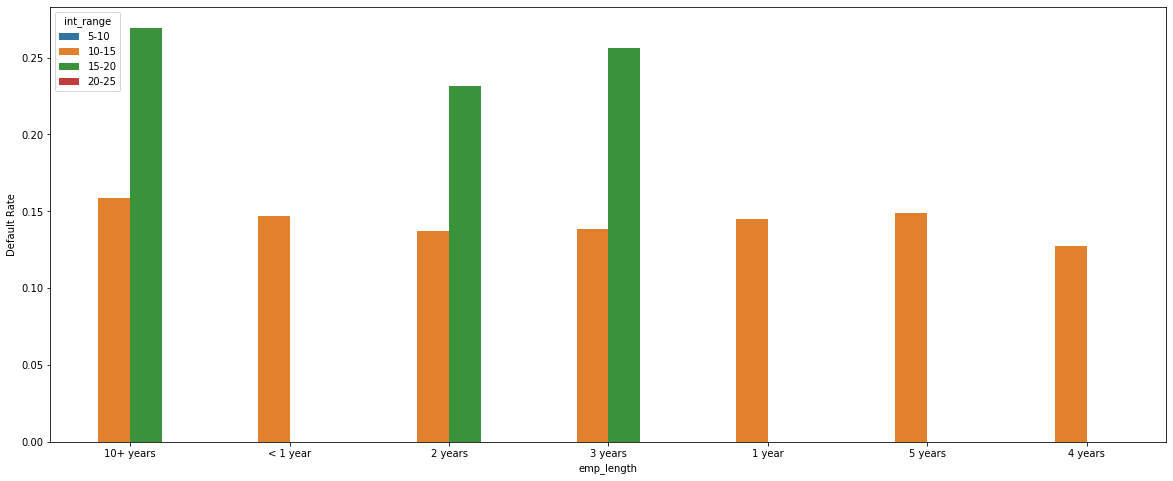

 emp_length vs verification_status


emp_length verification_status  Default Rate  No. of Defaulters
5   10+ years            Verified         0.184                615
3   10+ years        Not Verified         0.129                420
4   10+ years     Source Verified         0.156                296
30   < 1 year        Not Verified         0.139                276
6     2 years        Not Verified         0.113                230
9     3 years        Not Verified         0.118                213
0      1 year        Not Verified         0.134                206
31   < 1 year     Source Verified         0.132                190
8     2 years            Verified         0.152                181
15    5 years        Not Verified         0.127                178

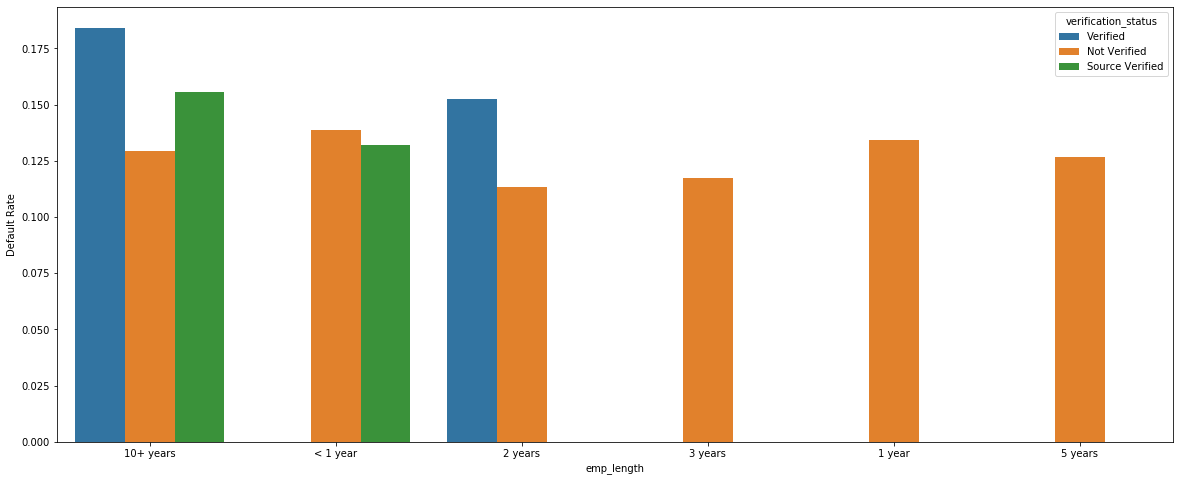

 loan_amnt_range vs annual_inc_range


loan_amnt_range annual_inc_range  Default Rate  No. of Defaulters
0            0-5000          1-50000         0.160                916
5        5000-10000          1-50000         0.155                907
6        5000-10000     50000-100000         0.109                625
11      10000-15000     50000-100000         0.121                489
10      10000-15000          1-50000         0.187                478
16      15000-20000     50000-100000         0.180                462
1            0-5000     50000-100000         0.111                356
21      20000-25000     50000-100000         0.193                309
15      15000-20000          1-50000         0.225                212
26  25000 and above     50000-100000         0.261                205

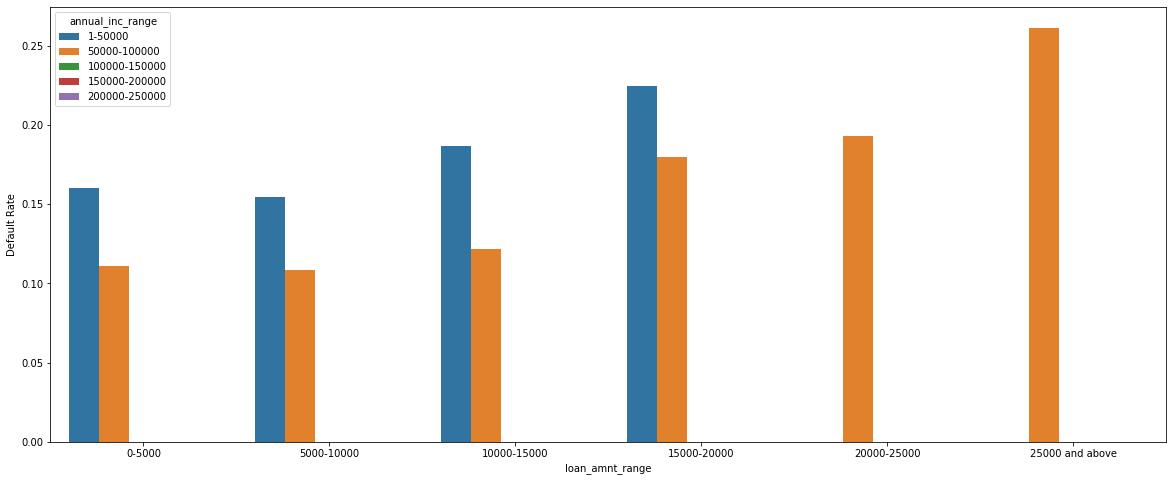

 loan_amnt_range vs term


loan_amnt_range  term  Default Rate  No. of Defaulters
2        5000-10000    36         0.106               1145
0            0-5000    36         0.125               1053
4       10000-15000    36         0.097                529
5       10000-15000    60         0.236                526
3        5000-10000    60         0.245                497
7       15000-20000    60         0.260                482
9       20000-25000    60         0.263                347
11  25000 and above    60         0.278                287
6       15000-20000    36         0.108                269
1            0-5000    60         0.257                261

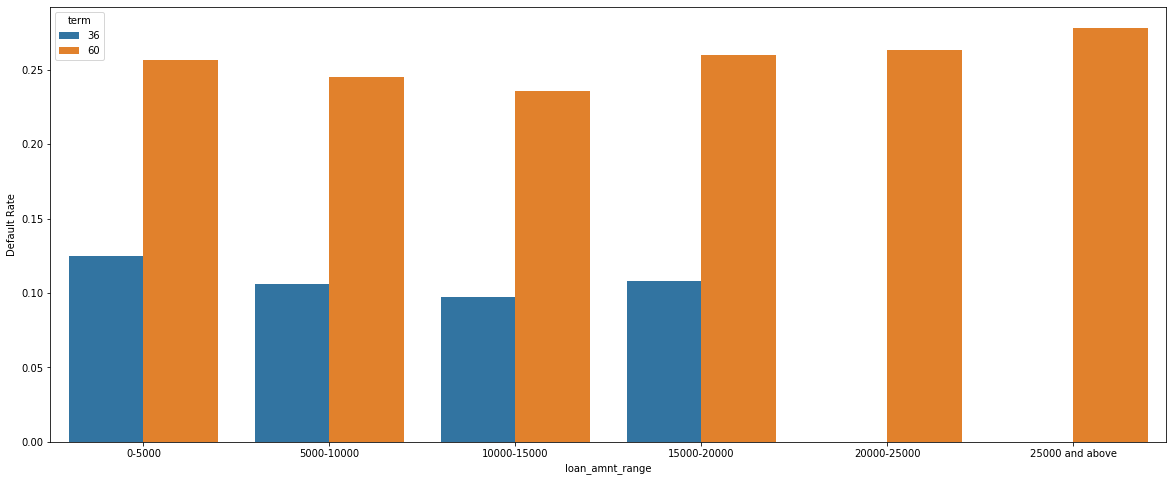

 loan_amnt_range vs int_range


loan_amnt_range int_range  Default Rate  No. of Defaulters
5       5000-10000     10-15         0.148                864
1           0-5000     10-15         0.152                690
9      10000-15000     10-15         0.137                500
6       5000-10000     15-20         0.233                430
10     10000-15000     15-20         0.230                355
13     15000-20000     10-15         0.154                347
4       5000-10000      5-10         0.064                320
2           0-5000     15-20         0.257                314
14     15000-20000     15-20         0.265                304
0           0-5000      5-10         0.081                296

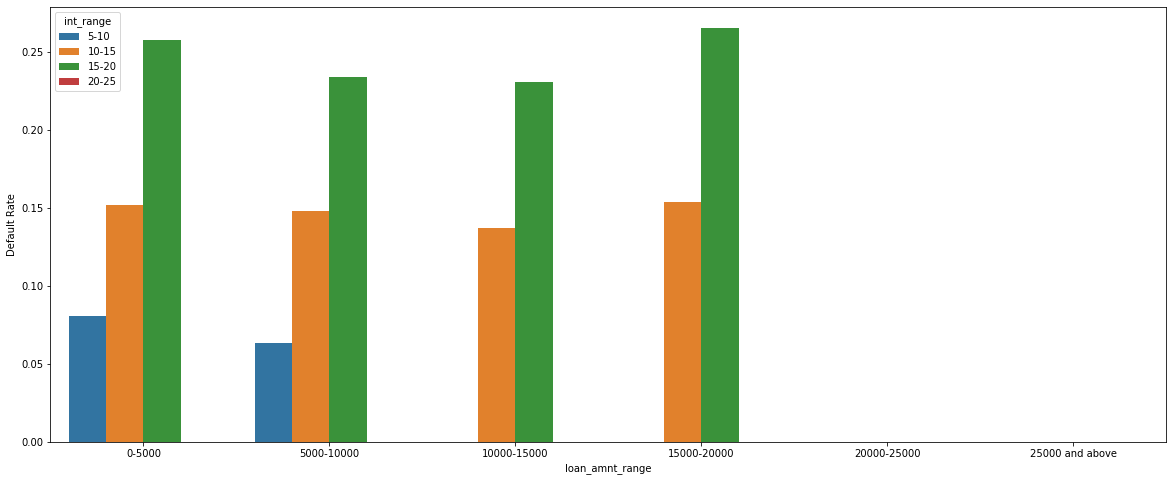

 loan_amnt_range vs verification_status


loan_amnt_range verification_status  Default Rate  No. of Defaulters
3       5000-10000        Not Verified         0.121                798
0           0-5000        Not Verified         0.130                708
4       5000-10000     Source Verified         0.129                439
11     15000-20000            Verified         0.177                413
5       5000-10000            Verified         0.145                405
14     20000-25000            Verified         0.186                388
1           0-5000     Source Verified         0.148                387
6      10000-15000        Not Verified         0.122                383
8      10000-15000            Verified         0.148                356
7      10000-15000     Source Verified         0.148                316

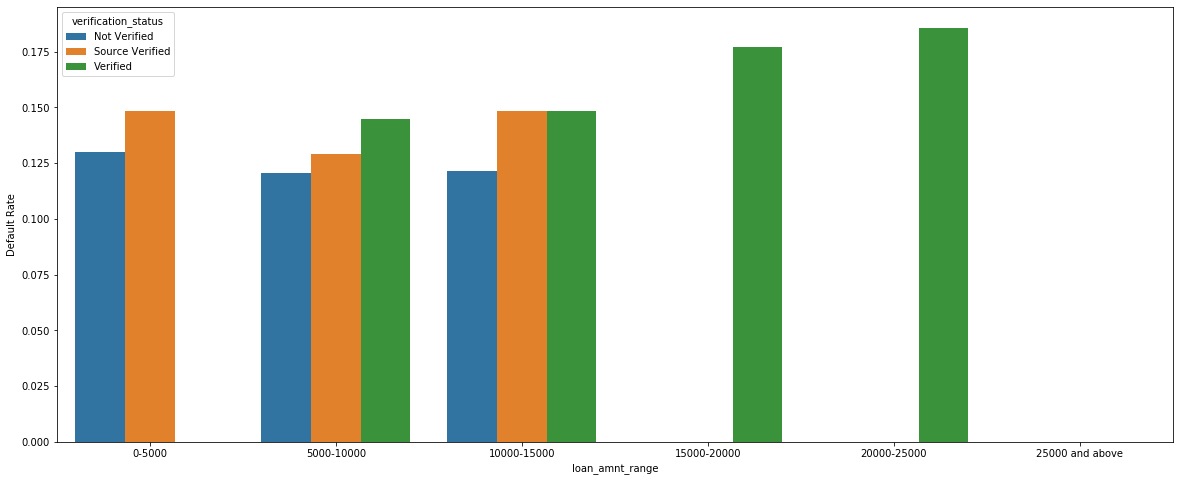

 annual_inc_range vs term


annual_inc_range  term  Default Rate  No. of Defaulters
0          1-50000    36         0.137               1673
2     50000-100000    36         0.096               1267
3     50000-100000    60         0.246               1179
1          1-50000    60         0.295                940
4    100000-150000    36         0.075                215
5    100000-150000    60         0.188                214
7    150000-200000    60         0.194                 52
6    150000-200000    36         0.079                 51
8    200000-250000    36         0.092                 18
9    200000-250000    60         0.134                 11

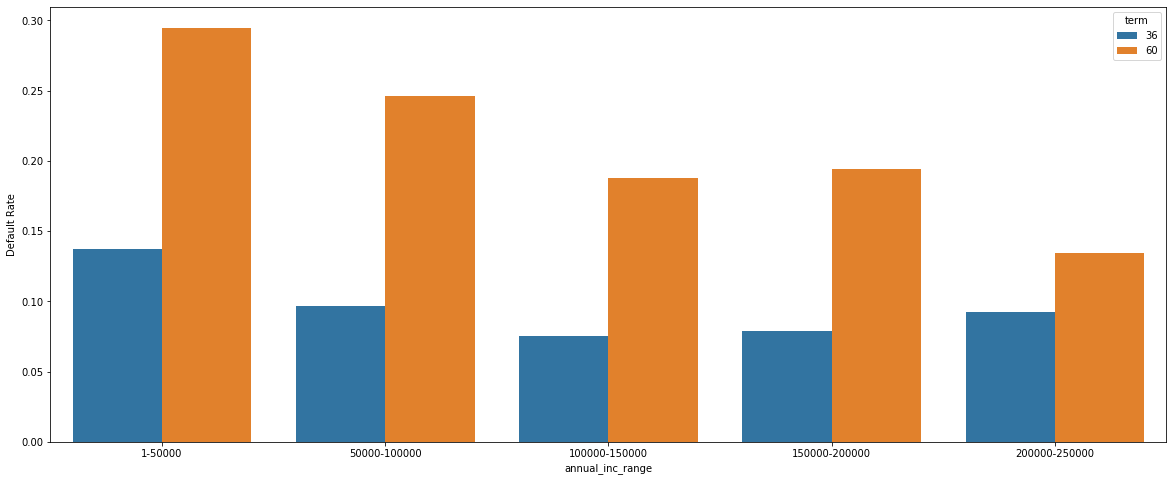

 annual_inc_range vs int_range


annual_inc_range int_range  Default Rate  No. of Defaulters
1           1-50000     10-15         0.179               1365
5      50000-100000     10-15         0.135               1115
6      50000-100000     15-20         0.247                862
2           1-50000     15-20         0.275                710
0           1-50000      5-10         0.092                464
4      50000-100000      5-10         0.054                308
9     100000-150000     10-15         0.102                181
7      50000-100000     20-25         0.392                161
10    100000-150000     15-20         0.186                159
3           1-50000     20-25         0.481                 74

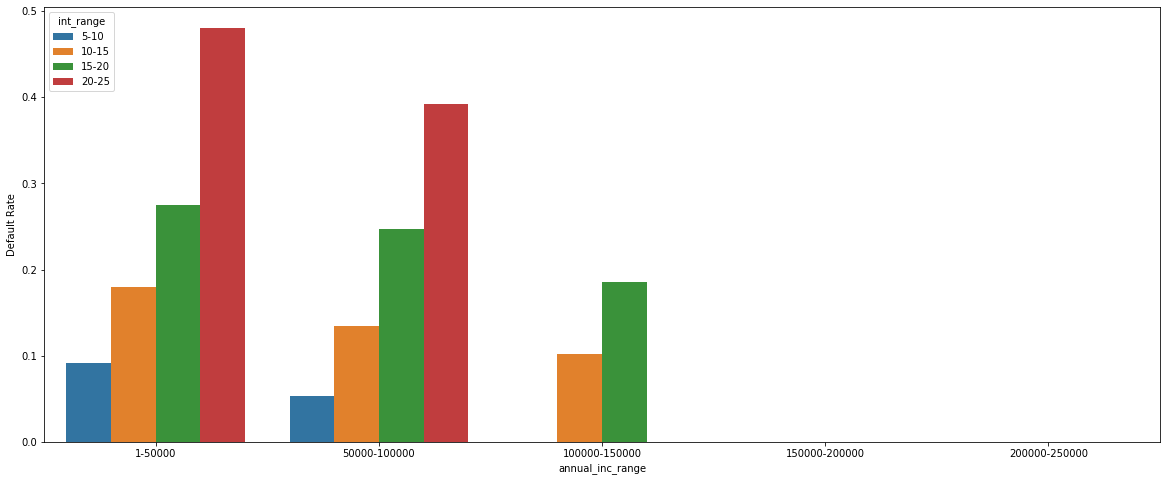

 annual_inc_range vs verification_status


annual_inc_range verification_status  Default Rate  No. of Defaulters
0           1-50000        Not Verified         0.150               1185
5      50000-100000            Verified         0.167               1056
3      50000-100000        Not Verified         0.111                819
1           1-50000     Source Verified         0.173                729
2           1-50000            Verified         0.214                699
4      50000-100000     Source Verified         0.135                571
8     100000-150000            Verified         0.117                225
6     100000-150000        Not Verified         0.094                111
7     100000-150000     Source Verified         0.105                 93
11    150000-200000            Verified         0.105                 52

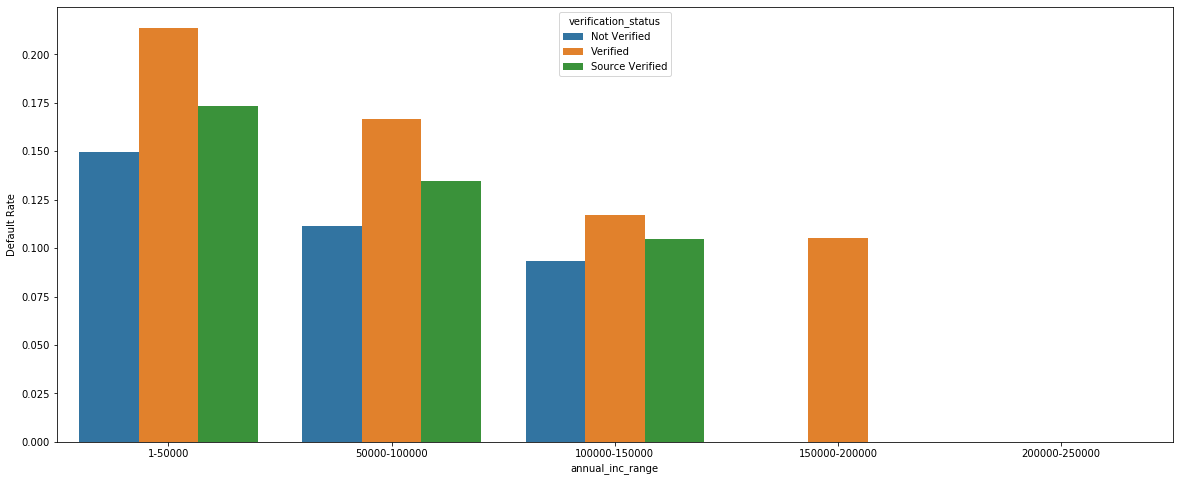

 term vs int_range


term int_range  Default Rate  No. of Defaulters
1    36     10-15         0.129               1828
6    60     15-20         0.294               1157
5    60     10-15         0.216                879
0    36      5-10         0.064                736
2    36     15-20         0.193                637
7    60     20-25         0.387                270
4    60      5-10         0.121                 94
3    36     20-25         0.356                 26

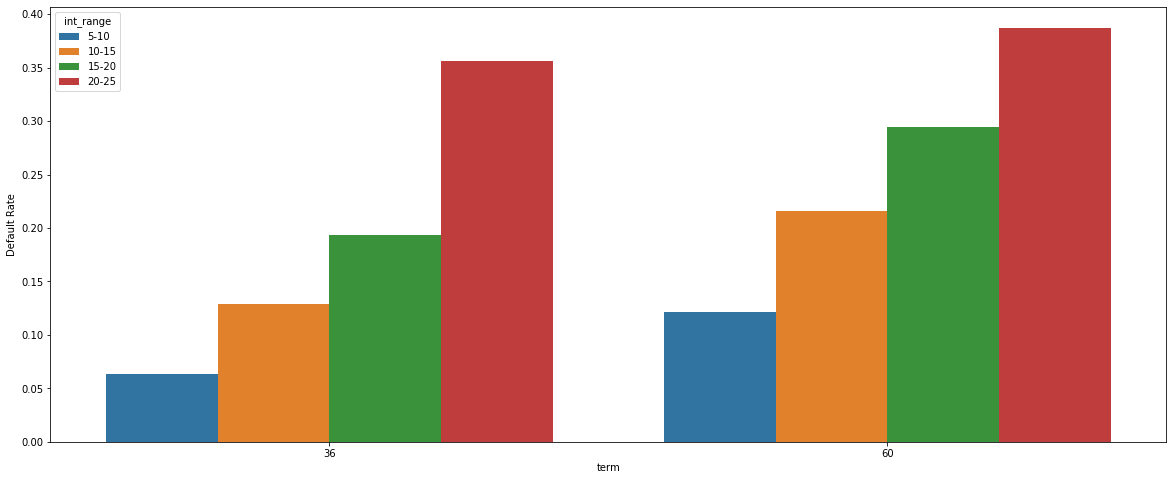

 term vs verification_status


term verification_status  Default Rate  No. of Defaulters
0    36        Not Verified         0.114               1652
5    60            Verified         0.260               1191
2    36            Verified         0.113                860
4    60     Source Verified         0.265                719
1    36     Source Verified         0.103                715
3    60        Not Verified         0.225                490

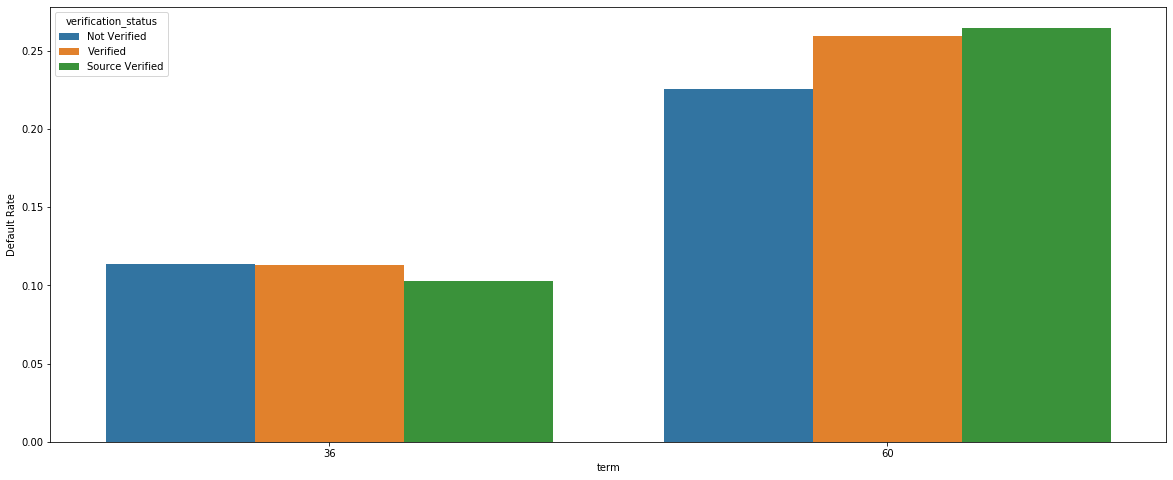

 int_range vs verification_status


int_range verification_status  Default Rate  No. of Defaulters
3      10-15        Not Verified         0.147               1234
5      10-15            Verified         0.154                866
8      15-20            Verified         0.255                811
4      10-15     Source Verified         0.142                607
7      15-20     Source Verified         0.256                523
6      15-20        Not Verified         0.229                460
0       5-10        Not Verified         0.067                419
1       5-10     Source Verified         0.067                210
2       5-10            Verified         0.069                201
11     20-25            Verified         0.361                173

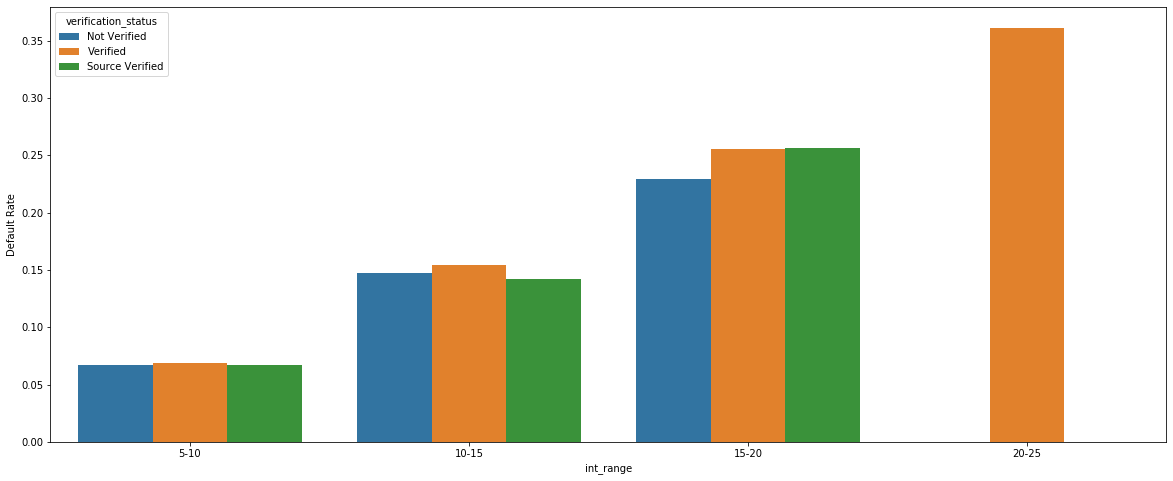

In [59]:
#Function for bivariate analysis
def bivariate(x_label,stack):
    table = pd.pivot_table(loan, values='loan_status', index=[x_label,stack], aggfunc=[np.mean,np.sum])
    table.reset_index(inplace=True)
    table.columns = table.columns.droplevel(1)
    table=table.sort_values(['sum','mean'], ascending=[False,False])
    rows=len(table)/2
    table=table[:10]
    table=table.rename(columns={"sum": "No. of Defaulters", "mean": "Default Rate"})
    display(table)
    table=table.drop(columns="No. of Defaulters")
    plt.figure(figsize=(20,8))
    ax=sns.barplot(x=x_label,y="Default Rate",data=table, hue=stack)
    ax.set(ylabel="Default Rate")
    plt.show()

#All possible bivariate combinations variables analysis on default rate
variables=['sub_grade','grade','home_ownership','purpose','emp_length','loan_amnt_range','annual_inc_range','term','int_range','verification_status']
from itertools import combinations 
for x in list(combinations(variables, 2)):
    print ('\033[1m',x[0],"vs",x[1])
    bivariate(x[0],x[1])

<b>[Analysis]:</b>
This covers top 3 observations:-
1. Applicant with low income and rented home or mortgage are more likely to default. 
2. Applicant with low income and loan taken for longer term are likely to default.
3. Applicant who have taken loan at high interest rate and for long term are likely to default.

## 4. Driving factors

Univariate Analysis-
Purpose, Grade, Interest rate, Loan amount, Annual Income, Employee length, Verification status, Term, Sub-grade, Addr_state <br>

Bivariate Analysis:-
Term vs Annual Income,
Home ownership vs Annual Income,
Term vs Interest rate range

## 5. Recommendations

Lending club should take care while approving loan for applicants with any of the below variables as there are chances of default:-
1. Grade G applicants are more likely to default. Default Rate increases from grade A to G.
2. Applicants who have taken loan for small business are more likely to be defaulters.
3. Applicants who have low annual income (less than 50000) are more likely to default.  
4. Applicants who self employed or employment type is not specified are more likely to default.(Assumption: For employees whose employment type is n/a is assumed as self employed )
5. As interest rate increases default rate increases. Company needs to be careful while considering loan application at 20% and above interest rate.
6. Default rate is high if loan is taken for longer term. Company needs to be careful while considering loan application for 60 months.
7. Applicant with low income (less than 50000) and rented home or mortgage are more likely to default. 
8. Applicant with low income (less than 50000) and loan taken for longer term (60mon) are likely to default.
9. Applicant who have taken loan at high interest rate (20% & above) and for long term(60mon) are likely to default.
